## Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*
    
    *ii. Drop Outliers*


#### 3. Feature Engineering with sqlite3 Module


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement XGBoost Classifer
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement KNN Classifer
- Implement Random Forest Classifer
- Compare The Models



## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
# plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#### *ii. Load Dataset*

In [5]:
#tree = pd.read_csv("../data&resources/covtype.csv")

In [2]:
treetypes = pd.read_csv('treetypes.csv')
tree = treetypes.copy()
tree

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2112,339,39,49,17,467,107,151,162,435,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
249996,2872,90,31,251,147,2027,248,172,27,508,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
249997,2336,57,5,0,0,1429,224,228,139,387,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
249998,2563,181,10,0,0,1349,223,246,156,1007,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [3]:
tree.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


In [4]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [5]:
tree.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.000,2748.505,418.301,1859.000,2375.000,2753.000,3108.000,3857.000
Aspect,250000.000,156.212,109.653,0.000,65.000,125.000,260.000,360.000
Slope,250000.000,16.331,8.317,0.000,10.000,15.000,22.000,65.000
Horizontal_Distance_To_Hydrology,250000.000,228.094,209.630,0.000,66.000,180.000,330.000,1390.000
Vertical_Distance_To_Hydrology,250000.000,50.898,61.007,-163.000,5.000,32.000,79.000,598.000
Horizontal_Distance_To_Roadways,250000.000,1719.967,1330.818,0.000,756.000,1318.000,2294.000,7112.000
Hillshade_9am,250000.000,212.370,30.655,0.000,195.000,220.000,235.000,254.000
Hillshade_Noon,250000.000,218.511,22.681,0.000,206.000,222.000,235.000,254.000
Hillshade_3pm,250000.000,134.503,46.034,0.000,106.000,137.000,167.000,252.000
Horizontal_Distance_To_Fire_Points,250000.000,1521.757,1107.378,0.000,734.000,1273.000,1998.000,7150.000


In [6]:
tree.apply(lambda x: x.nunique())

Elevation                             1983
Aspect                                 361
Slope                                   59
Horizontal_Distance_To_Hydrology      1294
Vertical_Distance_To_Hydrology         578
Horizontal_Distance_To_Roadways       6501
Hillshade_9am                          207
Hillshade_Noon                         165
Hillshade_3pm                          253
Horizontal_Distance_To_Fire_Points    6487
Wilderness_Area_1                        2
Wilderness_Area_2                        2
Wilderness_Area_3                        2
Wilderness_Area_4                        2
Soil_Type_1                              2
Soil_Type_2                              2
Soil_Type_3                              2
Soil_Type_4                              2
Soil_Type_5                              2
Soil_Type_6                              2
Soil_Type_7                              2
Soil_Type_8                              2
Soil_Type_9                              2
Soil_Type_1

>### Summary results :
>- ``"Elevation"``, `"Slope"`, `"Horizontal_Distance_To_Hydrology"`, `"Vertical_Distance_To_Hydrology"`, `"Horizontal_Distance_To_Roadways"`, `"Horizontal_Distance_To_Fire_Points"` are continuous variables and their values vary.
>- `"Aspect"` is also continuous and its values vary from 0 to 360. It has angular values.
>- ``"Hillshade_3pm"``, ``"Hillshade_Noon"``, ``"Hillshade_3pm"`` are also continuos and their values vary from 0 to 255. This means that the values represent bitwise value. I concluded that the values are RGB color representation of the shadow at a particular time.
>- ``Wilderness_Areas`` and `Soil_Types` are categorical (binary 1 or 0) data.

In [7]:
tree_type_dist = pd.DataFrame(tree.Cover_Type.value_counts())
tree_type_dist["ratio"] = tree.Cover_Type.value_counts(normalize = True)*100
tree_type_dist.columns = ["count", "ratio"]
tree_type_dist

,count,ratio
5,36079,14.432
1,35836,14.334
2,35780,14.312
6,35695,14.278
7,35690,14.276
4,35529,14.212
3,35391,14.156


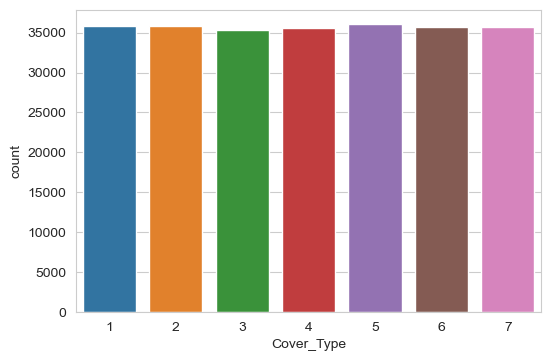

In [8]:
sns.countplot(tree.Cover_Type);

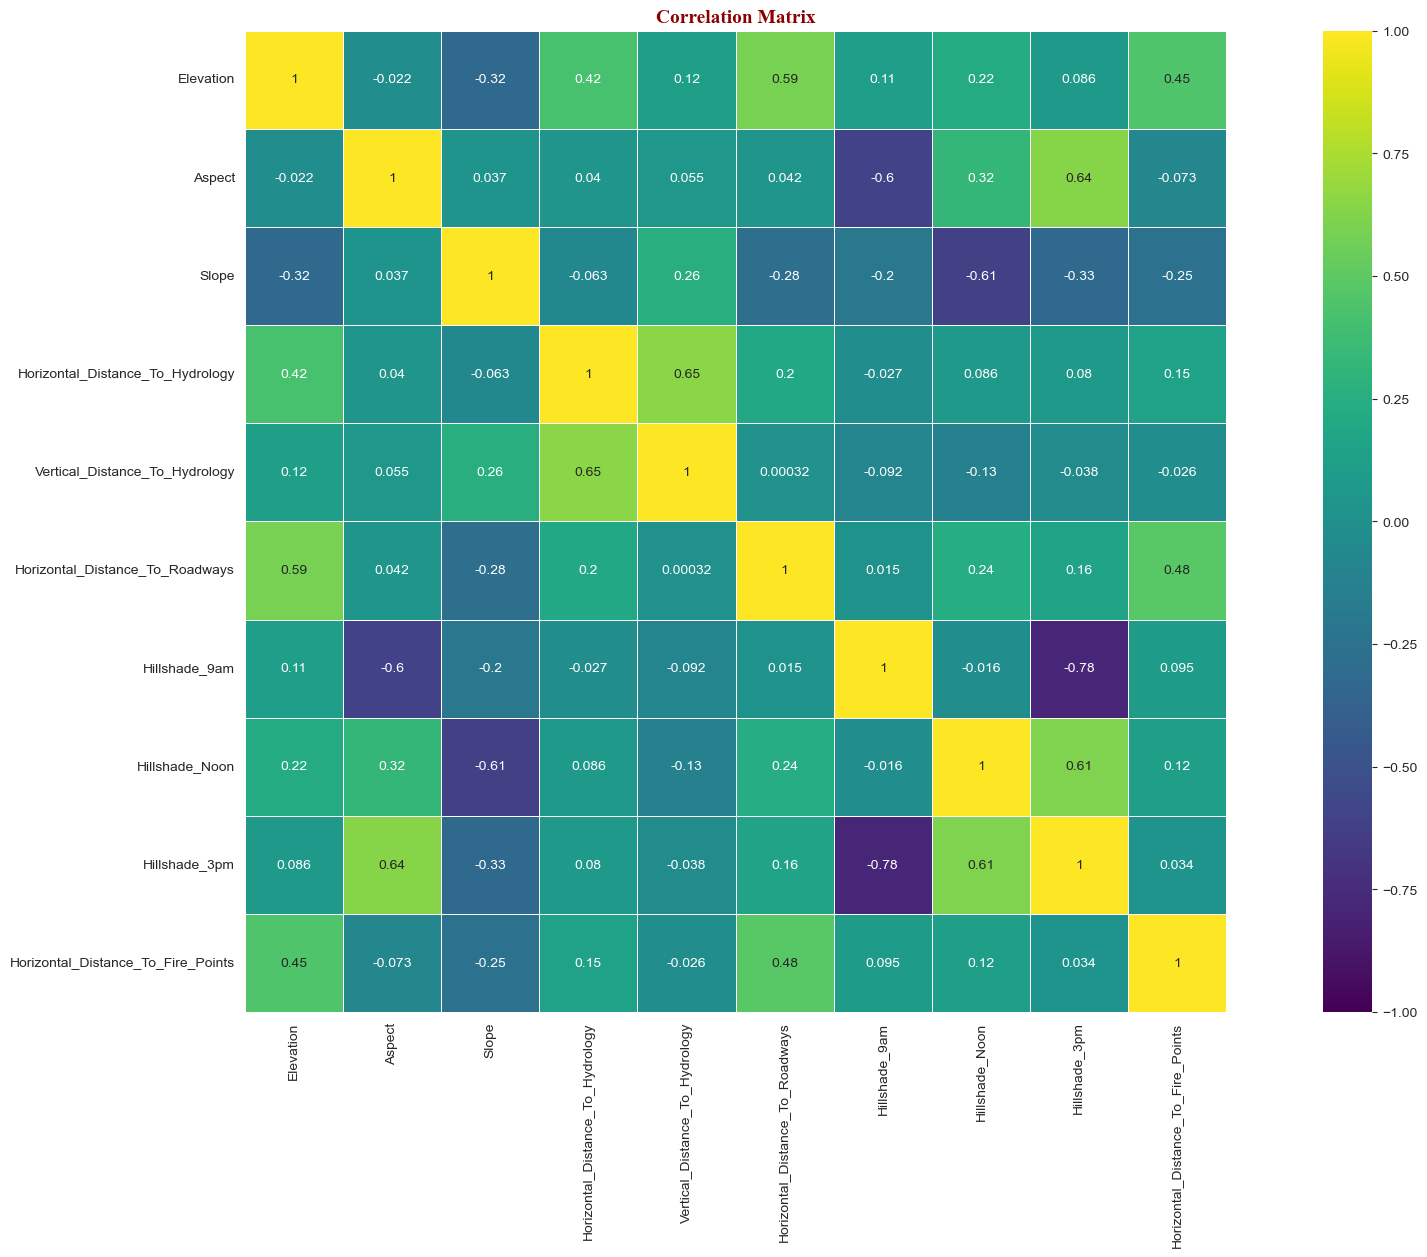

In [9]:
corr_matrix = tree[tree.columns[:10]].corr()

font_title = {'family': 'times new roman',
              'color': 'darkred',
              'weight': 'bold',
              'size': 14}

plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)
plt.show()

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [10]:
tree.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.

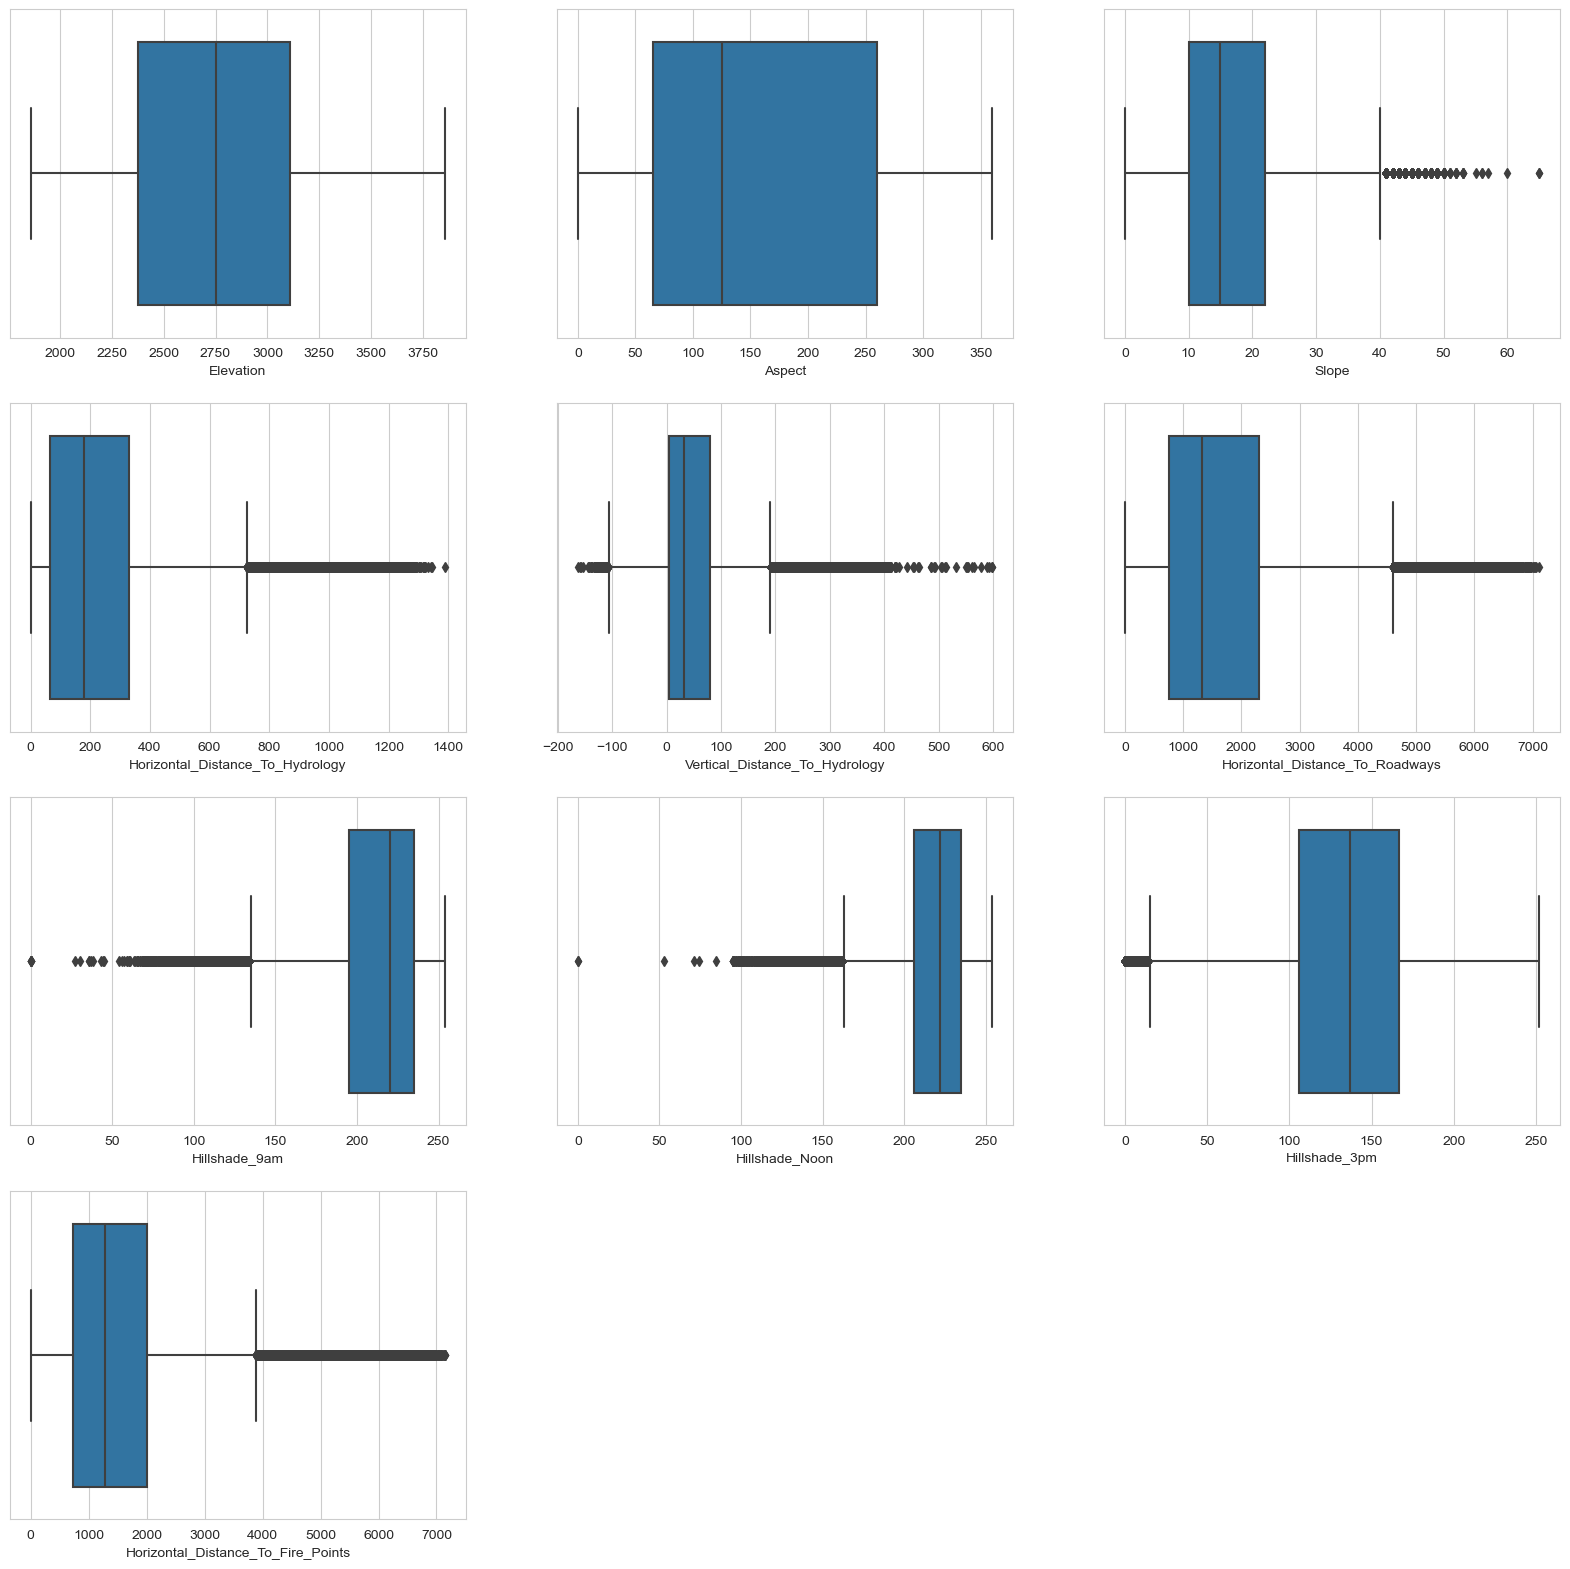

In [11]:
index = 0
plt.figure(figsize=(20,20))
for feature in tree.columns[:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(x=feature, data=tree, whis=1.5)

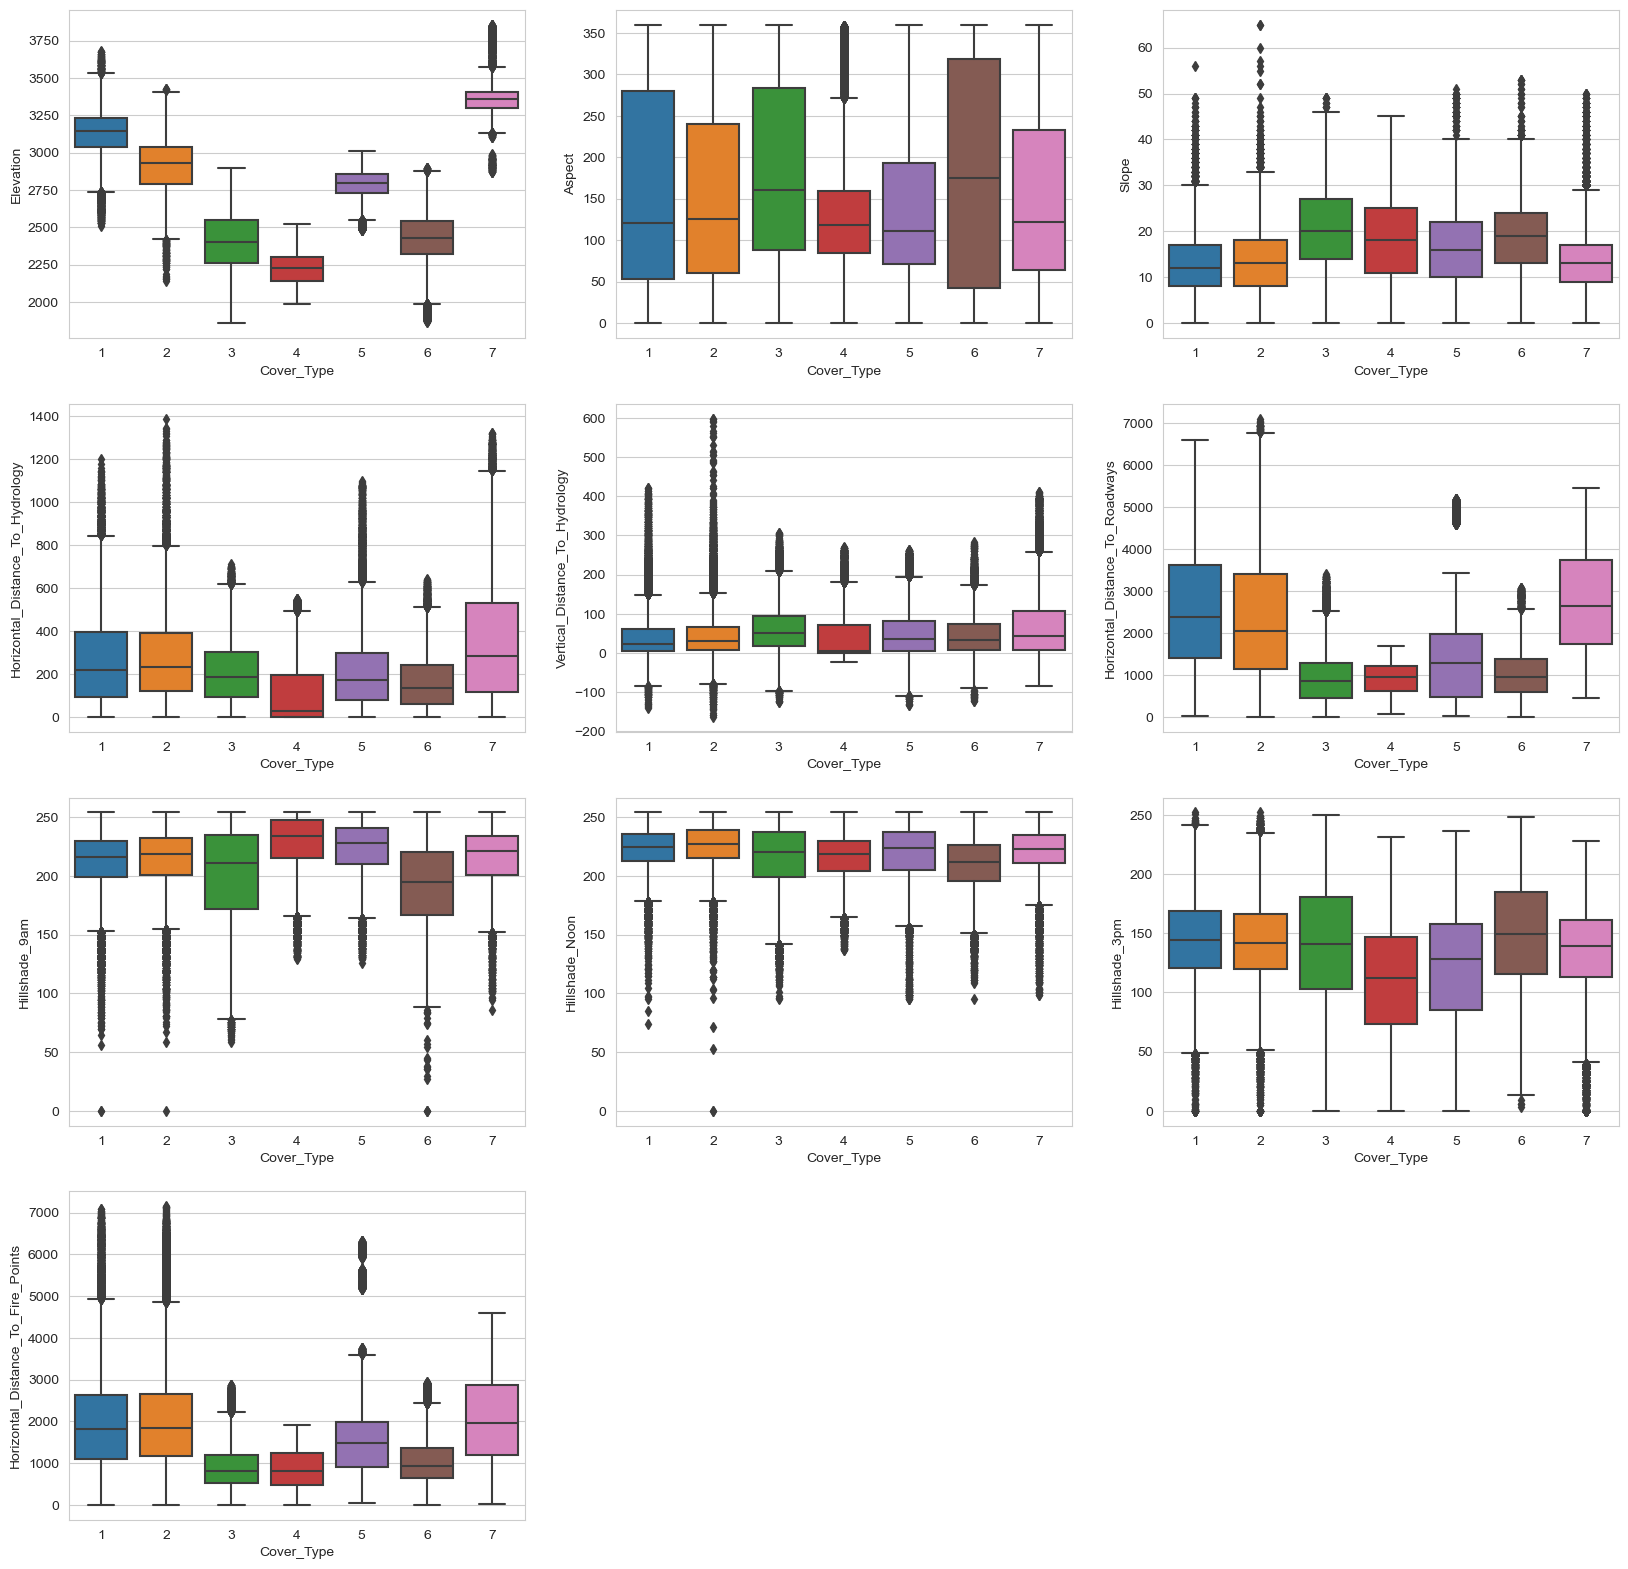

In [12]:
index = 0
plt.figure(figsize=(20,20))
for feature in tree.columns[:10]:
    index += 1
    plt.subplot(4,3,index)
    sns.boxplot(y = feature, x = "Cover_Type", data = tree, whis=1.5)

### Deal with Outliers

#### *i. Visualize Zscore Tresholds (how many times IQR) by Continuous Variables*

There are many different methods for outliers. You can use IQR values used as standard to deal with outliers, or you can define two functions to help you understand the outliers and how you can deal with them.
- Two functions given as extra for outlier detection are given below.

In [13]:
from scipy.stats import zscore
from scipy import stats
from numpy import percentile

In [14]:
'''This function detects the best z-score for outlier detection in the specified column.'''

def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.05, print_list = False):
    z_scores = stats.zscore(df[col].dropna())
    threshold_list = []
    
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
    
    df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
    df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    df_outlier['pct'] = df_outlier['pct'].apply(lambda x : x-100 if x == 100 else x)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    IQR_coef = round((best_treshold - 0.675) / 1.35, 2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    num_outlier = df_outlier.iloc[df_outlier.pct.argmax(), 1]
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), colors="r", ls = ":")
    plt.annotate("Zscore : {}\nIQR_coef : {}\nValue : {}\nNum_outlier : {}\nPercentile : {}".format(best_treshold,
                                                                          IQR_coef,
                                                                          outlier_limit,
                                                                          num_outlier,     
                                                                          (np.round(percentile_threshold, 3), 
                                                                           np.round(100-percentile_threshold, 3))),
                                                                          (best_treshold, df_outlier.outlier_count.max()/2))
    plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, IQR_coef, outlier_limit, num_outlier, percentile_threshold)

In [15]:
'''This function plots histogram, boxplot and z-score/outlier graphs for the specified column.'''

def outlier_inspect(df, col, min_z = 1, max_z = 5, step = 0.05, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z = min_z, max_z = max_z, step = step)
    plt.show()

### How to convert z_score to IQR_Coef

https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097

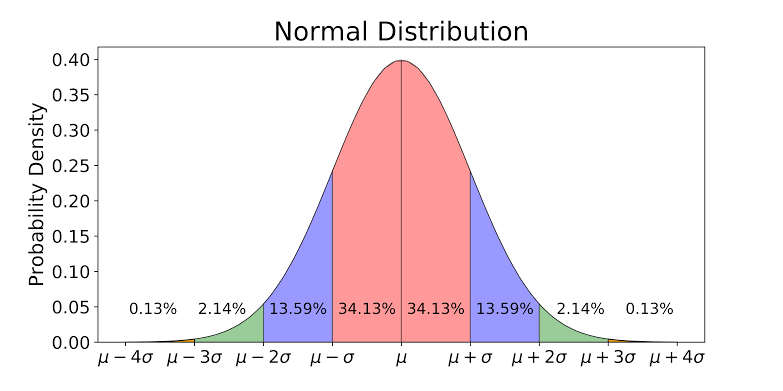

There are certain observations which could be inferred from this figure:

1.About 68.26% of the whole data lies within one standard deviation (<σ) of the mean (μ), taking both sides into account, the pink region in the figure.

2.About 95.44% of the whole data lies within two standard deviations (2σ) of the mean (μ), taking both sides into account, the pink+blue region in the figure.

3.About 99.72% of the whole data lies within three standard deviations (<3σ) of the mean (μ), taking both sides into account, the pink+blue+green region in the figure.

4.And the rest 0.28% of the whole data lies outside three standard deviations (>3σ) of the mean (μ), taking both sides into account, the little red region in the figure. And this part of the data is considered as outliers.

5.The first and the third quartiles, Q1 and Q3, lies at -0.675σ and +0.675σ from the mean, respectively.

z_score = 0.675 + IQR_coef*1.35 

IQR_coef = (z_score - 0.675) / 1.35

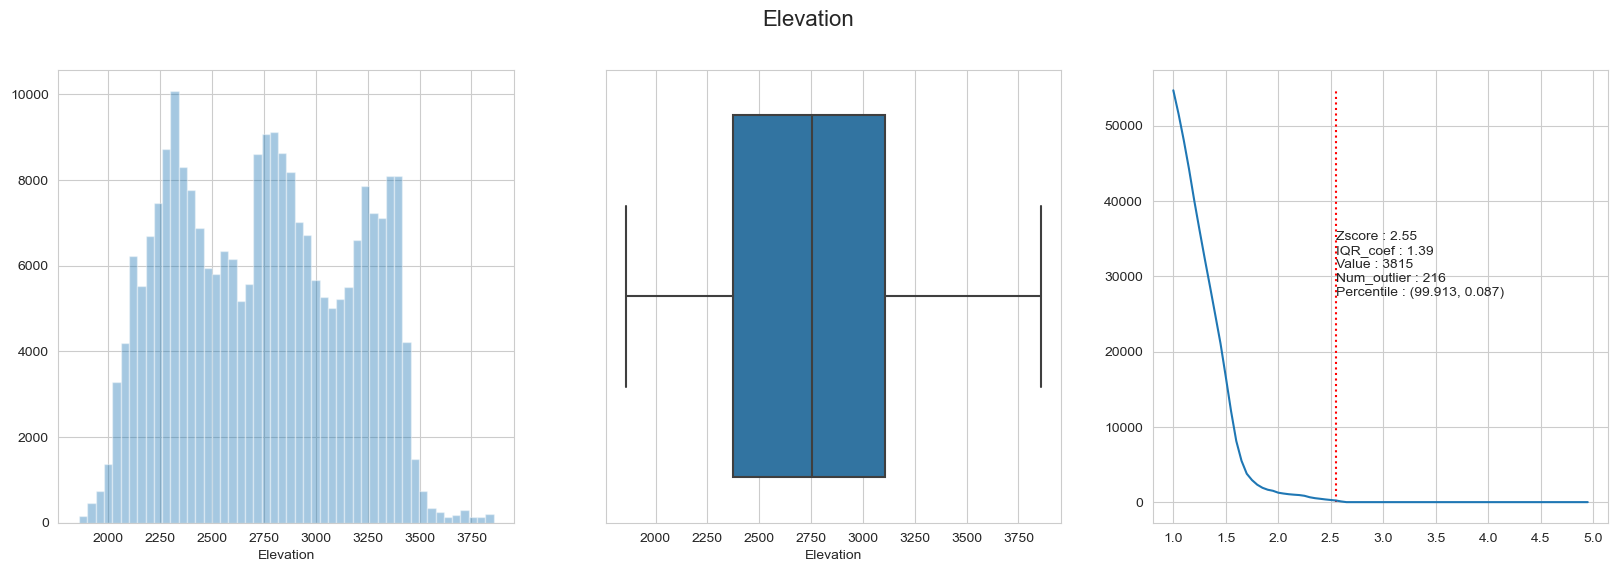

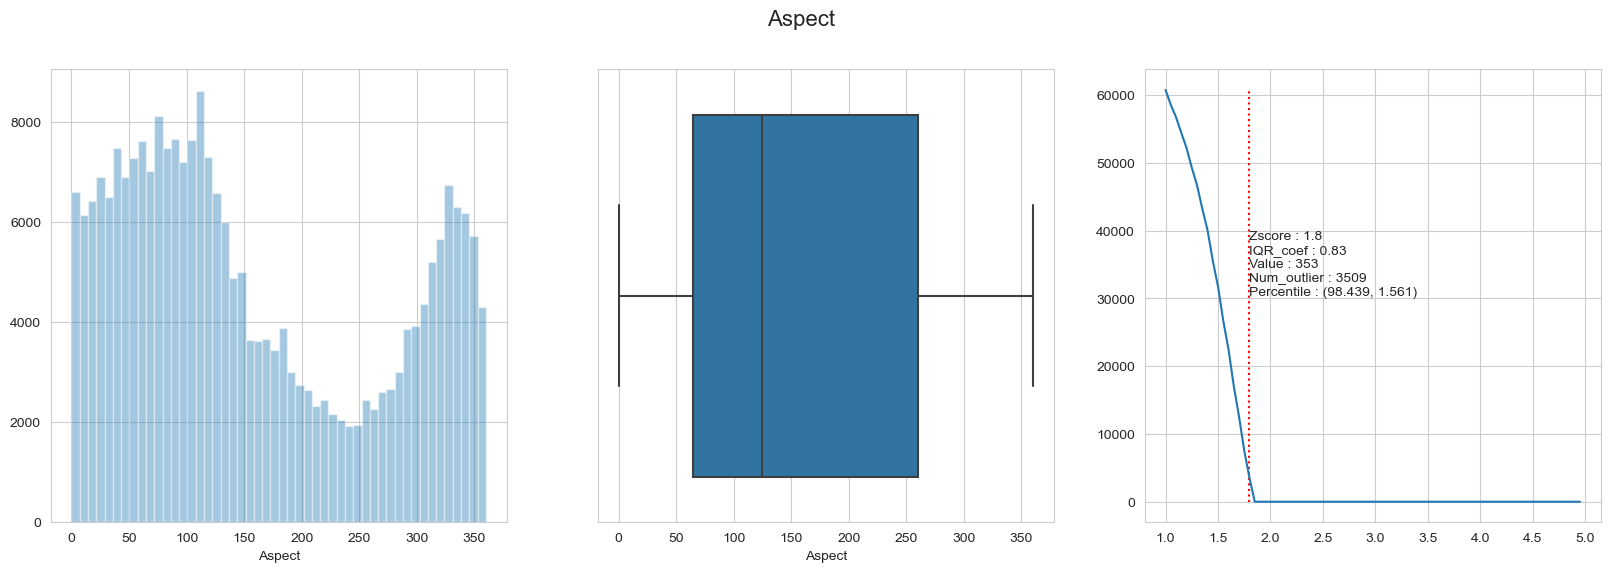

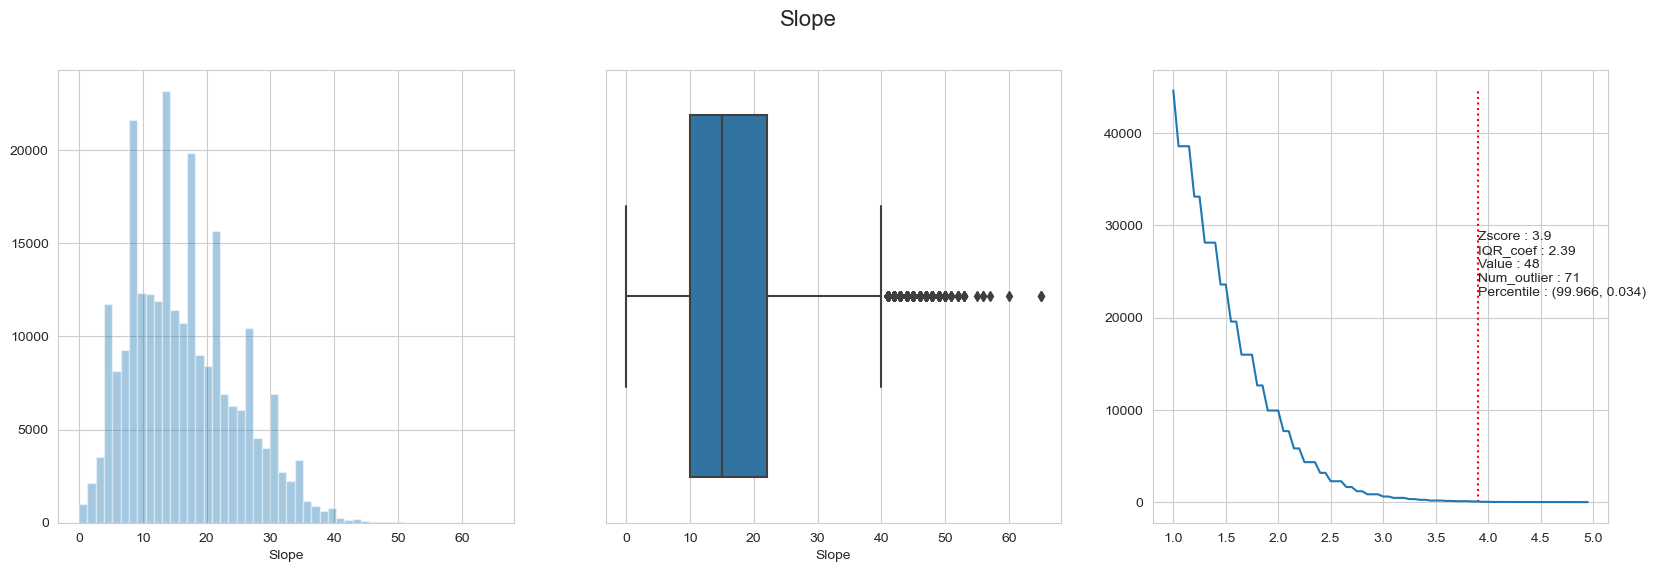

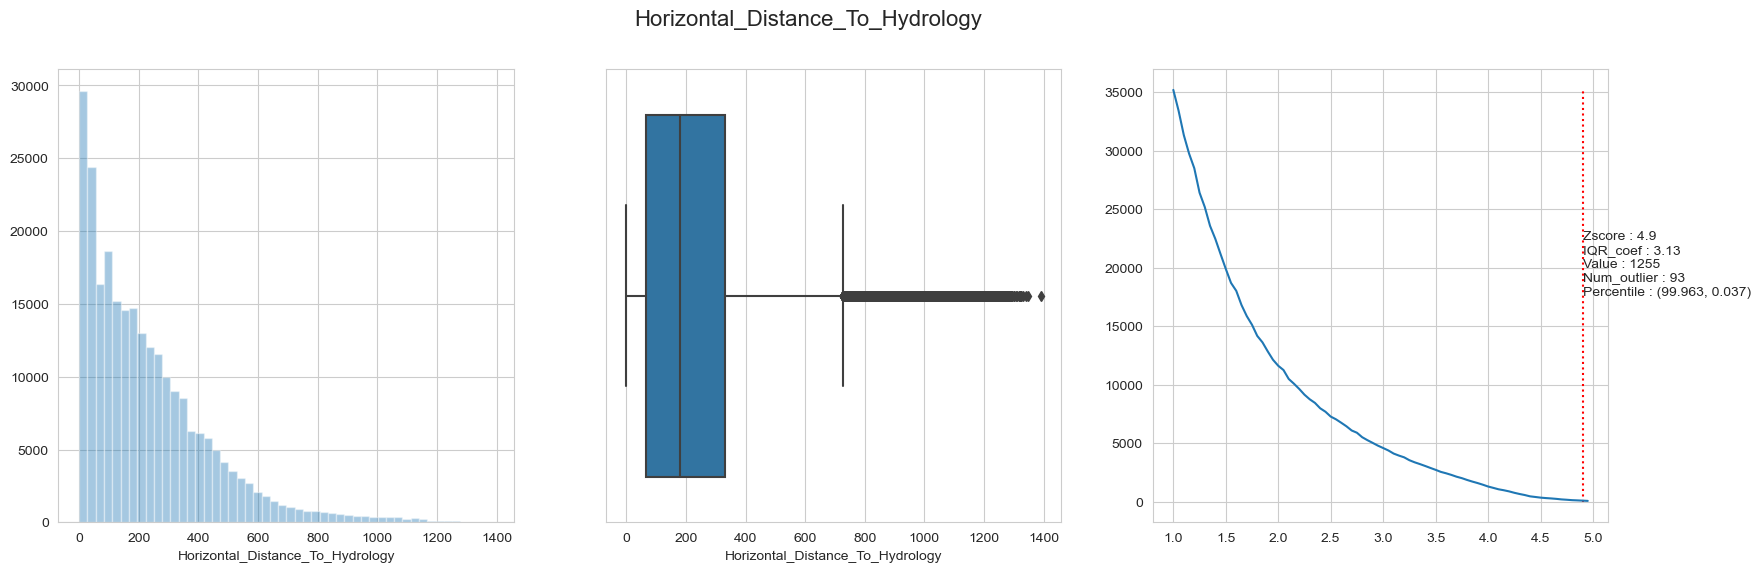

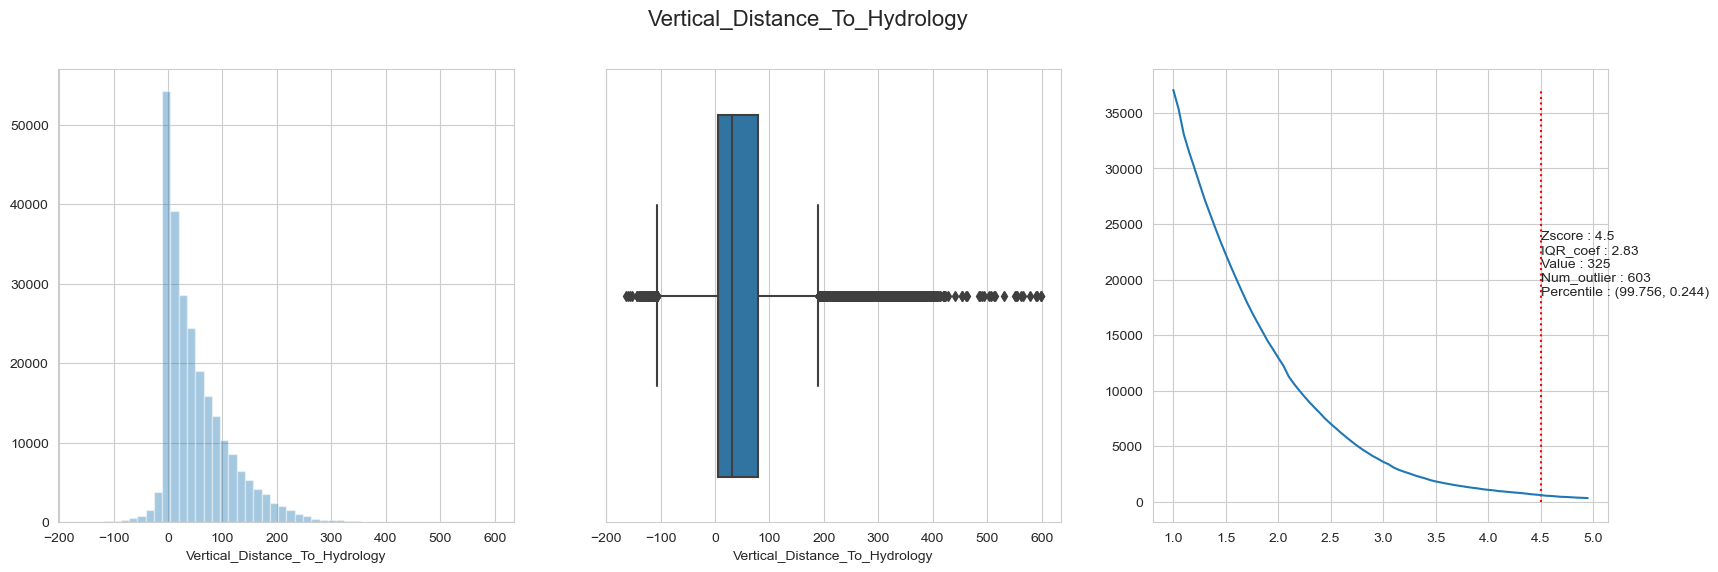

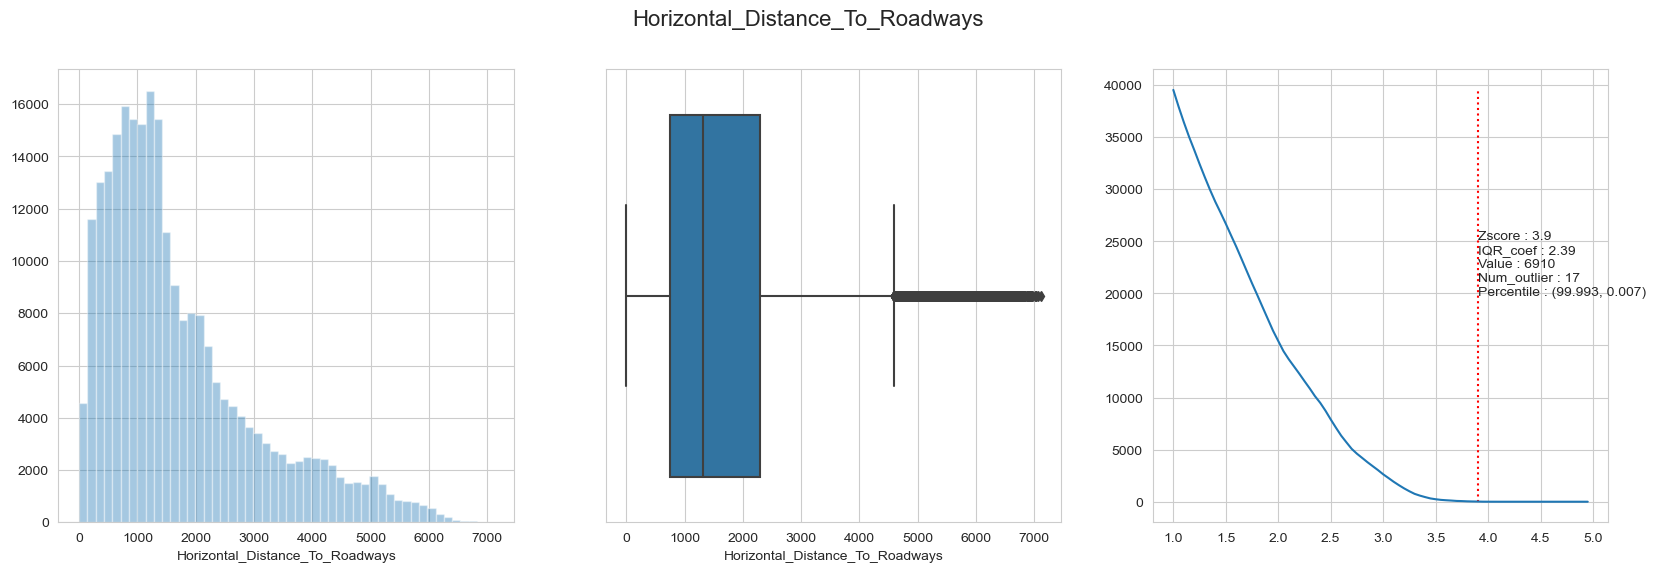

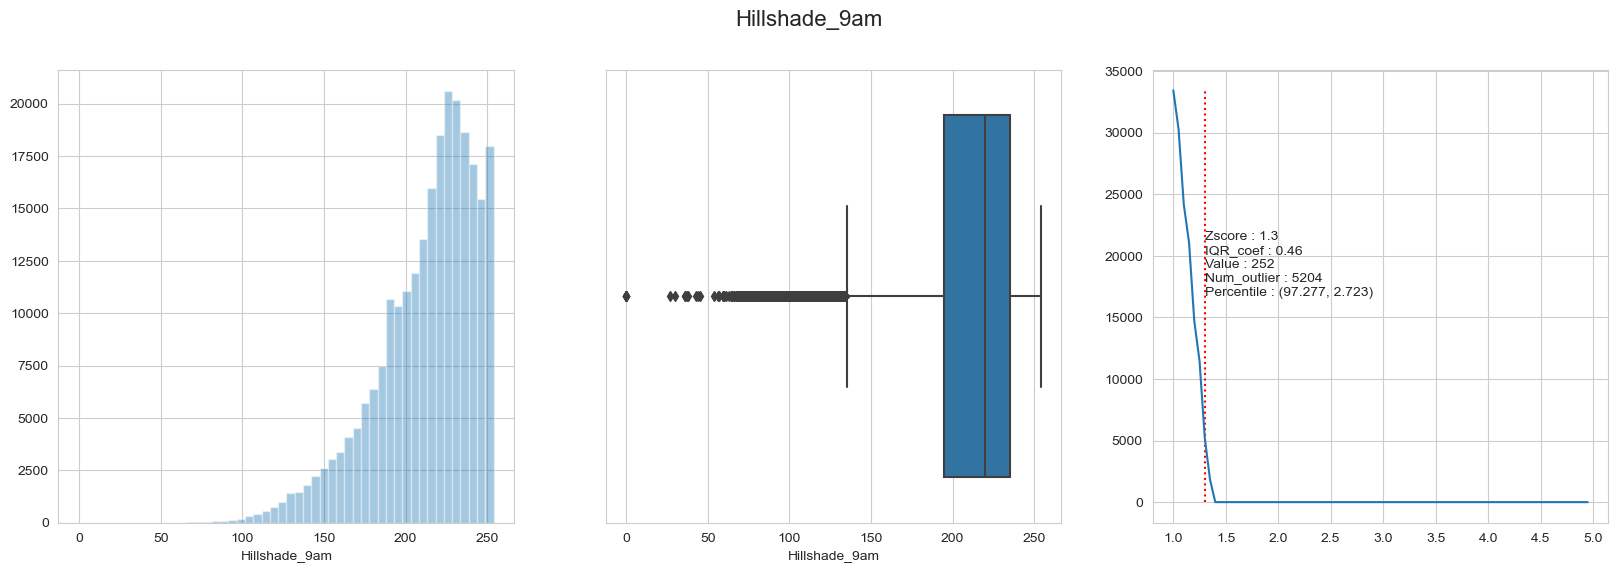

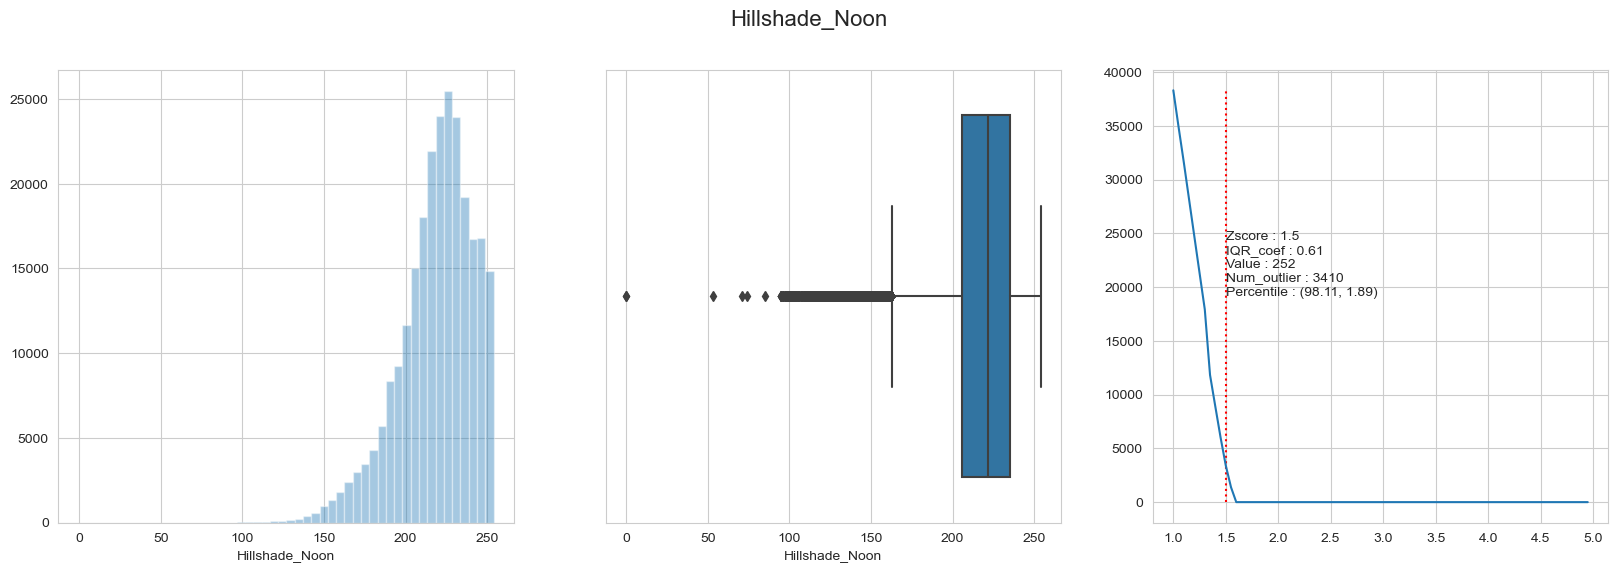

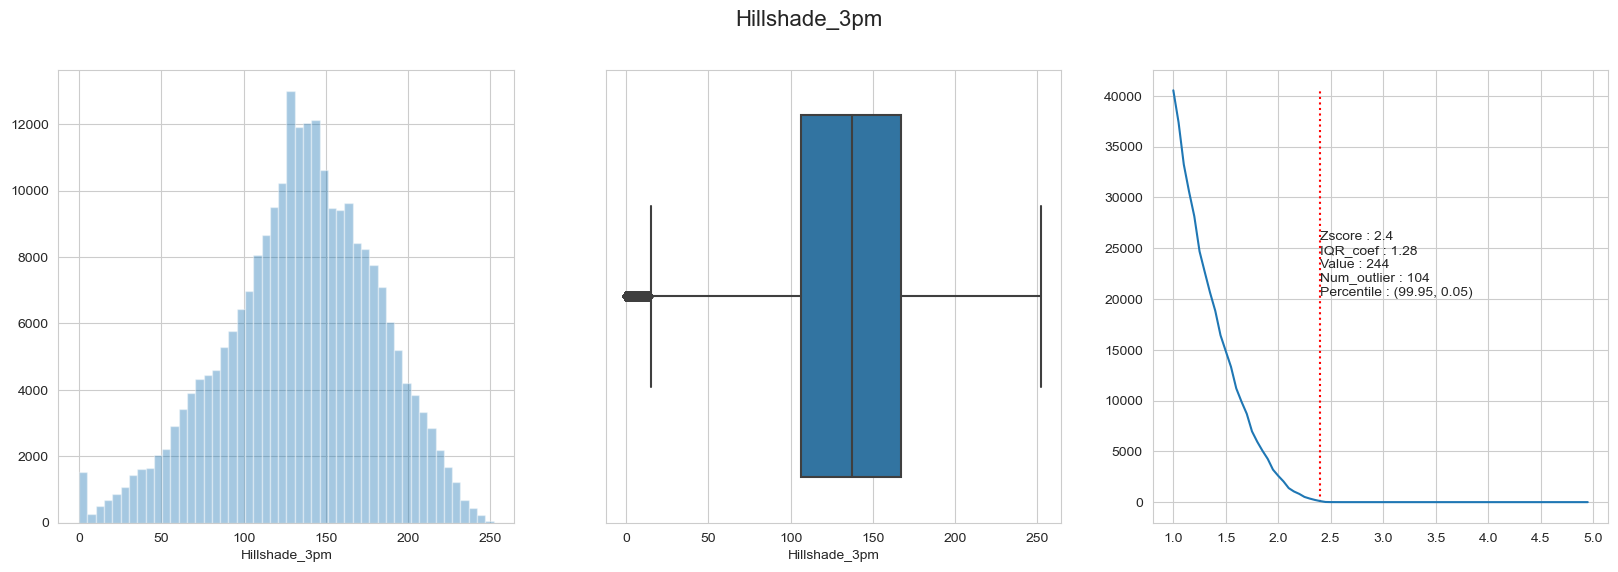

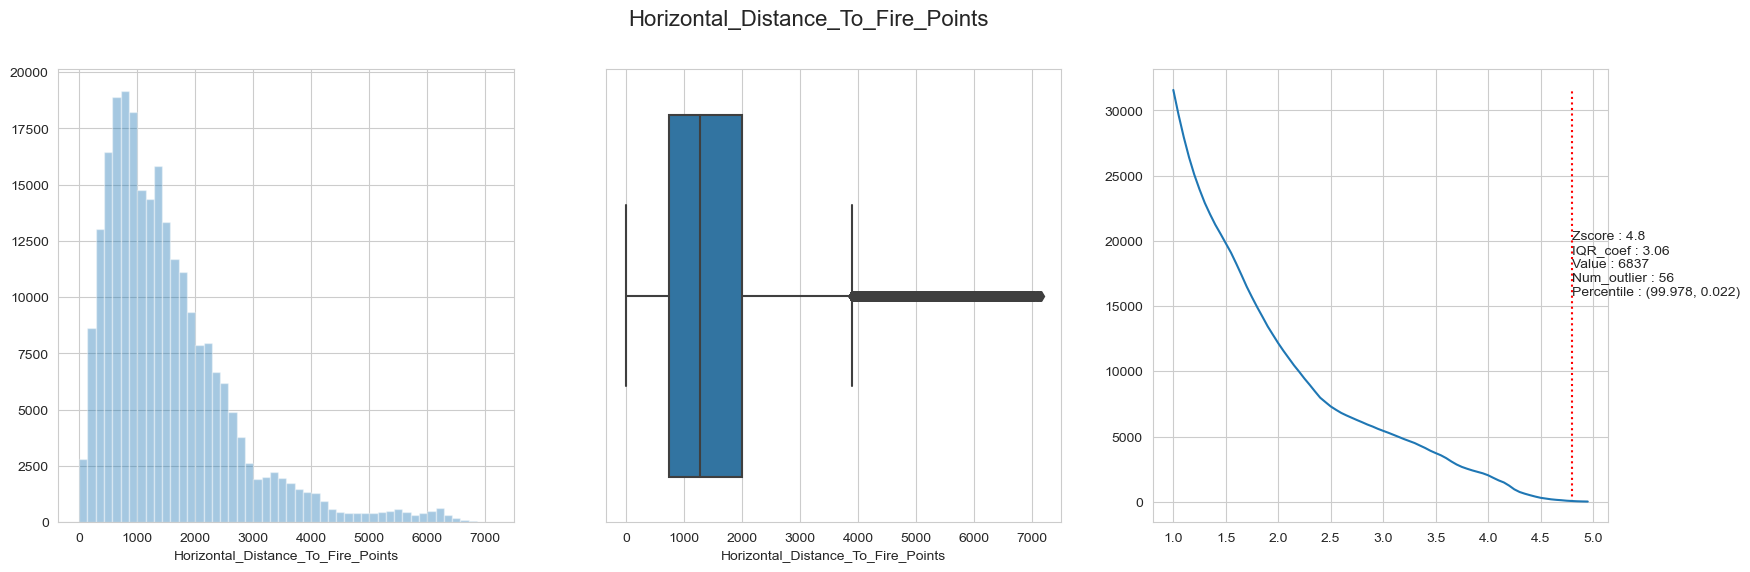

In [16]:
for col in tree.columns[:10]:
    outlier_inspect(tree, col)

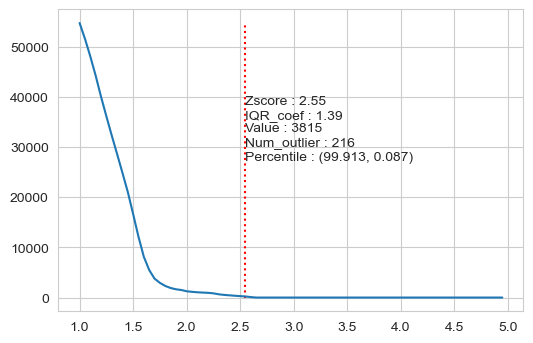

(<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
     threshold  outlier_count    pct
 0       1.000          54703  5.742
 1       1.050          51562  6.819
 2       1.100          48046  7.961
 3       1.150          44221  9.477
 4       1.200          40030  9.760
 5       1.250          36123 10.564
 6       1.300          32307 11.397
 7       1.350          28625 13.139
 8       1.400          24864 15.291
 9       1.450          21062 20.914
 10      1.500          16657 27.244
 11      1.550          12119 32.924
 12      1.600           8129 32.403
 13      1.650           5495 31.338
 14      1.700           3773 22.369
 15      1.750           2929 20.997
 16      1.800           2314 17.718
 17      1.850           1904 13.445
 18      1.900           1648  8.677
 19      1.950           1505 16.611
 20      2.000           1255  8.924
 21      2.050           1143  7.962
 22      2.100           1052  5.989
 23 

In [17]:
outlier_zscore(tree, "Elevation")

## Evaluation

1. There is no missing value in this data set.
2. When each feature is examined, although it is seen that there are outliers in the boxplots, it is evaluated that this dataset does not actually have an outlier.
3. However, since it was considered that the data with a z-score value above 4.73 (IQR_coef = 3) according to the tree type would adversely affect the model, it was decided to assign the Nan-Value to these data first and then drop them.

In [19]:
IQR_coef = 3
z_score = round(0.675 + IQR_coef*1.35, 2)
z_score

4.73

In [20]:
z_score = 3
iqr_coef = round((z_score - 0.675) / 1.35, 2)
iqr_coef

1.72

#### *ii. Drop Outliers*

You can define another function to detect outliers in accordance with the ``zscore`` (how many times IQR) value you choose according to the result from the previous functions.

In [21]:
df = tree.copy()

In [22]:
"""This function gives max/min threshold, number of data, number of outlier and plots its boxplot,
according to the tree type and the entered z-score value for the relevant column."""

def num_outliers(df, col, whis = 1.5):
    q1 = df.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    print("Column_name :", col)
    print("whis :", whis)
    print("-------------------------------------------")
    for i in np.sort(df.Cover_Type.unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        print("min_threshold:", min_threshold, "\nmax_threshold:", max_threshold)
        num_outliers = len(df[df["Cover_Type"]==i][col][(df[col]<min_threshold) | (df[col]>max_threshold)])
        print(f"Num_of_values for {i} :", len(df[df["Cover_Type"]==i]))
        print(f"Num_of_outliers for {i} :", num_outliers)
        print("-------------------------------------------")
    return sns.boxplot(y = df[col], x = df["Cover_Type"], whis=whis)

"""This function assigns the NaN-value first and then the mean value instead of the outlier values,
according to the tree type and the entered z_score value and plots the boxplot for the relevant column. """

def remove_outliers(df, col, whis=1.5):
    q1 = df.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    for i in np.sort(df.Cover_Type.unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        df.loc[((df["Cover_Type"]==i) & ((df[col]<min_threshold) | (df[col]>max_threshold))), col] = np.nan
        df[col] = df[col].fillna(df.groupby("Cover_Type")[col].transform("mean"))
    return sns.boxplot(y = df[col], x = df["Cover_Type"], whis=whis)

In [23]:
"""This function assigns the NaN-value first and then drop related rows, according to the tree type and the entered
whis value and plots the boxplot for the relevant column. """

def remove_outliers(df, col, whis=1.5):
    q1 = df.groupby("Cover_Type")[col].quantile(0.25)
    q3 = df.groupby("Cover_Type")[col].quantile(0.75)
    iqr = q3 - q1
    for i in np.sort(df.Cover_Type.unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        df.loc[((df["Cover_Type"]==i) & ((df[col]<min_threshold) | (df[col]>max_threshold))), col] = np.nan
    return sns.boxplot(y = df[col], x = df["Cover_Type"], whis=whis)

Elevation

Column_name : Elevation
whis : 3
-------------------------------------------
min_threshold: 2438.0 
max_threshold: 3831.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: 2047.0 
max_threshold: 3783.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: 1395.0 
max_threshold: 3411.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: 1655.0 
max_threshold: 2789.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: 2363.0 
max_threshold: 3224.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: 1655.0 
max_threshold: 3209.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: 2969.0 
max_threshold: 3739.0
Num_of_values for 7 

<AxesSubplot:xlabel='Cover_Type', ylabel='Elevation'>

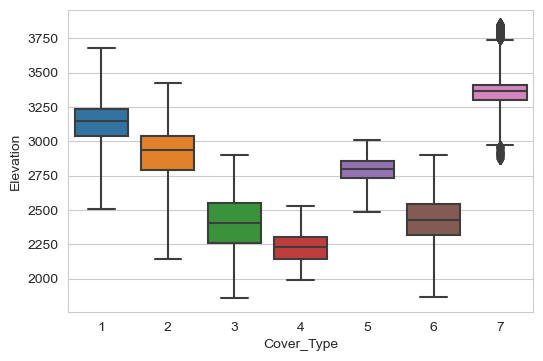

In [24]:
num_outliers(df, "Elevation", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Elevation'>

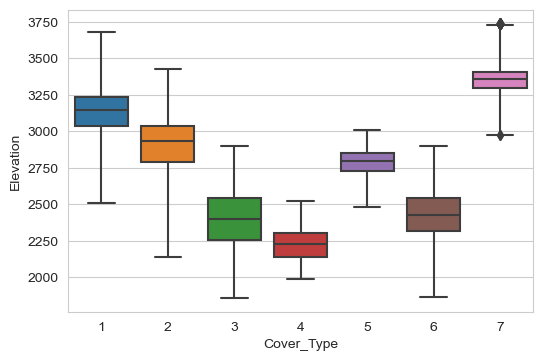

In [25]:
remove_outliers(df, "Elevation", whis=3)

Aspect

Column_name : Aspect
whis : 3
-------------------------------------------
min_threshold: -628.0 
max_threshold: 961.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -480.0 
max_threshold: 780.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -497.0 
max_threshold: 868.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -141.0 
max_threshold: 384.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -295.0 
max_threshold: 559.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -786.0 
max_threshold: 1146.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -443.0 
max_threshold: 740.0
Num_of_values for 7 : 35690
N

<AxesSubplot:xlabel='Cover_Type', ylabel='Aspect'>

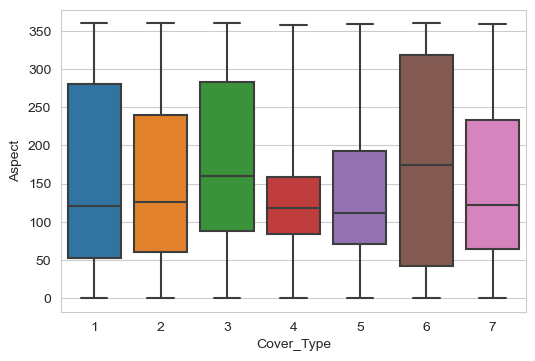

In [26]:
num_outliers(df, "Aspect", whis=3)

In [27]:
#remove_outliers(df, "Aspect", whis=3)

Slope

Column_name : Slope
whis : 3
-------------------------------------------
min_threshold: -19.0 
max_threshold: 44.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 14
-------------------------------------------
min_threshold: -22.0 
max_threshold: 48.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 9
-------------------------------------------
min_threshold: -25.0 
max_threshold: 66.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -31.0 
max_threshold: 67.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -26.0 
max_threshold: 58.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -20.0 
max_threshold: 57.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -15.0 
max_threshold: 41.0
Num_of_values for 7 : 35690
Num_of_outliers 

<AxesSubplot:xlabel='Cover_Type', ylabel='Slope'>

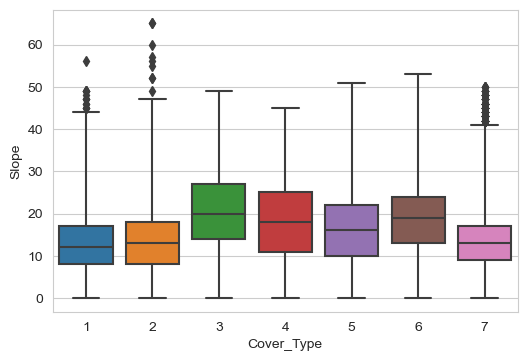

In [28]:
num_outliers(df, "Slope", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Slope'>

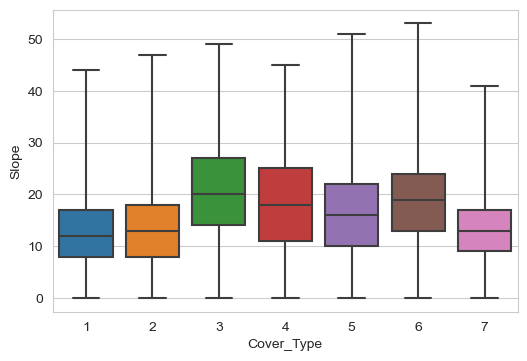

In [29]:
remove_outliers(df, "Slope", whis=3)

Horizontal_Distance_To_Hydrology

Column_name : Horizontal_Distance_To_Hydrology
whis : 3
-------------------------------------------
min_threshold: -805.0 
max_threshold: 1295.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -693.0 
max_threshold: 1204.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 50
-------------------------------------------
min_threshold: -537.0 
max_threshold: 933.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -591.0 
max_threshold: 788.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -580.0 
max_threshold: 960.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 129
-------------------------------------------
min_threshold: -480.0 
max_threshold: 780.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -1118.0 
max_threshold: 1766

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Hydrology'>

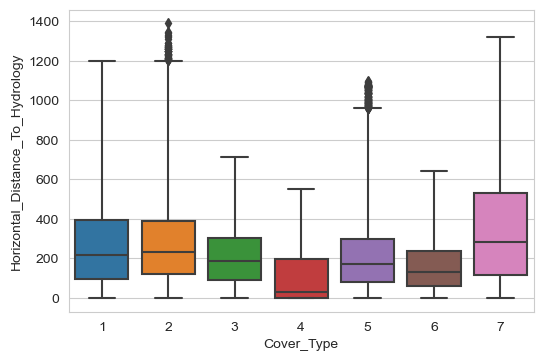

In [30]:
num_outliers(df, "Horizontal_Distance_To_Hydrology", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Hydrology'>

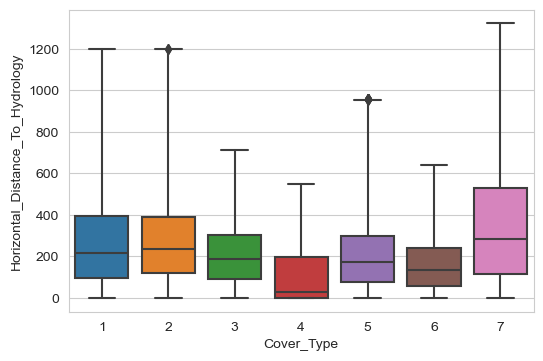

In [31]:
remove_outliers(df, "Horizontal_Distance_To_Hydrology", whis=3)

Vertical_Distance_To_Hydrology

Column_name : Vertical_Distance_To_Hydrology
whis : 3
-------------------------------------------
min_threshold: -170.0 
max_threshold: 236.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 391
-------------------------------------------
min_threshold: -166.0 
max_threshold: 240.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 445
-------------------------------------------
min_threshold: -210.0 
max_threshold: 322.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -216.0 
max_threshold: 288.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -223.0 
max_threshold: 309.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -190.0 
max_threshold: 272.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 9
-------------------------------------------
min_threshold: -292.0 
max_threshold: 408.0
Nu

<AxesSubplot:xlabel='Cover_Type', ylabel='Vertical_Distance_To_Hydrology'>

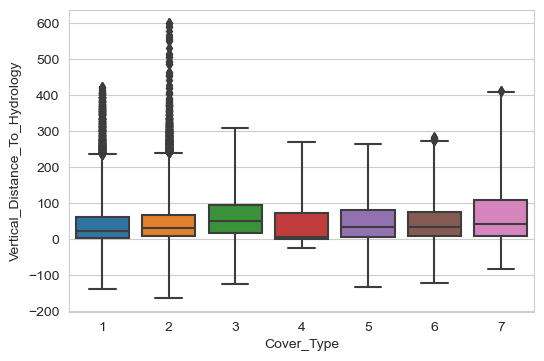

In [32]:
num_outliers(df, "Vertical_Distance_To_Hydrology", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Vertical_Distance_To_Hydrology'>

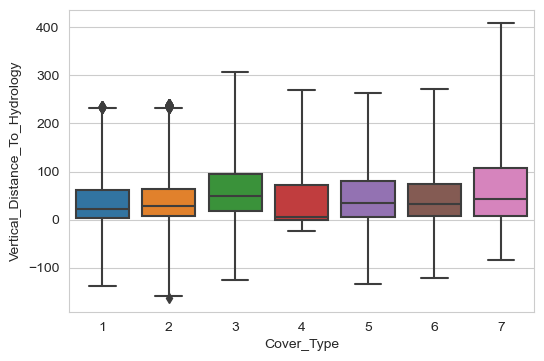

In [33]:
remove_outliers(df, "Vertical_Distance_To_Hydrology", whis=3)

Horizontal_Distance_To_Roadways

Column_name : Horizontal_Distance_To_Roadways
whis : 3
-------------------------------------------
min_threshold: -5270.0 
max_threshold: 10305.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -5620.0 
max_threshold: 10158.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -2013.0 
max_threshold: 3755.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -1153.0 
max_threshold: 2998.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -4010.0 
max_threshold: 6455.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -1777.0 
max_threshold: 3760.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -4265.0 
max_thresho

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Roadways'>

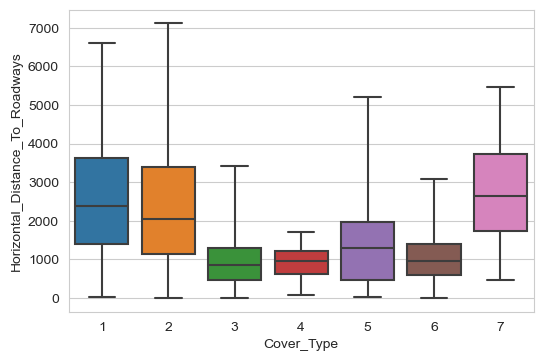

In [34]:
num_outliers(df, "Horizontal_Distance_To_Roadways", whis=3)

In [35]:
#remove_outliers(df, "Horizontal_Distance_To_Roadways", whis=3)

Hillshade_9am

Column_name : Hillshade_9am
whis : 3
-------------------------------------------
min_threshold: 106.0 
max_threshold: 323.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 68
-------------------------------------------
min_threshold: 108.0 
max_threshold: 325.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 79
-------------------------------------------
min_threshold: -17.0 
max_threshold: 424.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: 116.0 
max_threshold: 347.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: 117.0 
max_threshold: 334.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: 8.0 
max_threshold: 379.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 3
-------------------------------------------
min_threshold: 102.0 
max_threshold: 333.0
Num_of_values for 7 : 35690
Nu

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_9am'>

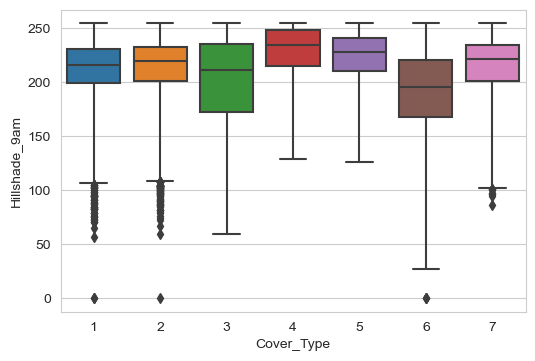

In [36]:
num_outliers(df, "Hillshade_9am", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_9am'>

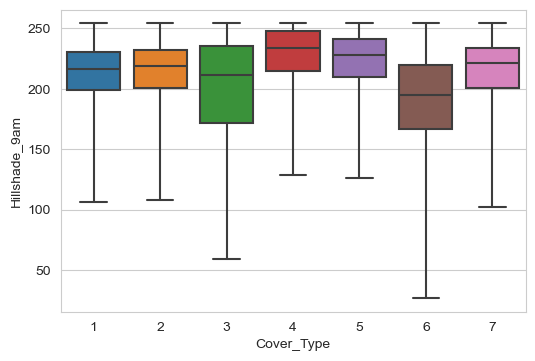

In [37]:
remove_outliers(df, "Hillshade_9am", whis=3)

Hillshade_Noon

Column_name : Hillshade_Noon
whis : 3
-------------------------------------------
min_threshold: 144.0 
max_threshold: 305.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 54
-------------------------------------------
min_threshold: 143.0 
max_threshold: 311.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 48
-------------------------------------------
min_threshold: 85.0 
max_threshold: 351.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: 126.0 
max_threshold: 308.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: 109.0 
max_threshold: 333.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 50
-------------------------------------------
min_threshold: 106.0 
max_threshold: 316.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 1
-------------------------------------------
min_threshold: 139.0 
max_threshold: 307.0
Num_of_values for 7 : 35690

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_Noon'>

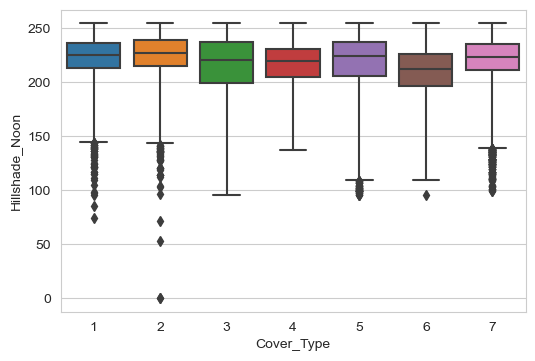

In [38]:
num_outliers(df, "Hillshade_Noon", whis=3) 

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_Noon'>

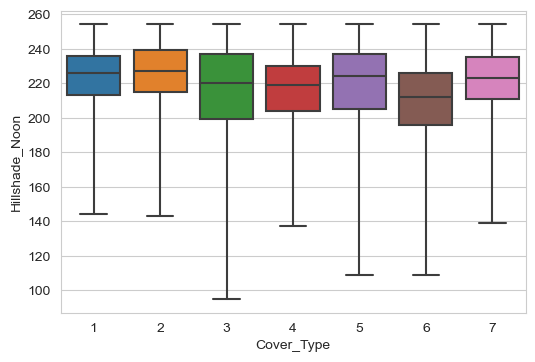

In [39]:
remove_outliers(df, "Hillshade_Noon", whis=3)

Hillshade_3pm

Column_name : Hillshade_3pm
whis : 3
-------------------------------------------
min_threshold: -23.0 
max_threshold: 313.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -18.0 
max_threshold: 304.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 0
-------------------------------------------
min_threshold: -131.0 
max_threshold: 415.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -149.0 
max_threshold: 369.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -134.0 
max_threshold: 377.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 0
-------------------------------------------
min_threshold: -91.0 
max_threshold: 392.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -31.0 
max_threshold: 305.0
Num_of_values for 7 : 35690

<AxesSubplot:xlabel='Cover_Type', ylabel='Hillshade_3pm'>

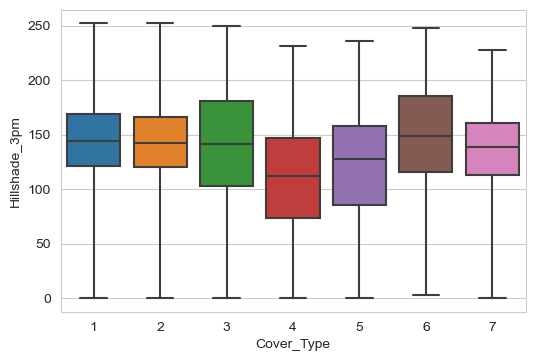

In [40]:
num_outliers(df, "Hillshade_3pm", whis=3)

In [41]:
#remove_outliers(df, "Hillshade_3pm", whis=3)

Horizontal_Distance_To_Fire_Points

Column_name : Horizontal_Distance_To_Fire_Points
whis : 3
-------------------------------------------
min_threshold: -3478.0 
max_threshold: 7218.0
Num_of_values for 1 : 35836
Num_of_outliers for 1 : 0
-------------------------------------------
min_threshold: -3258.0 
max_threshold: 7081.0
Num_of_values for 2 : 35780
Num_of_outliers for 2 : 6
-------------------------------------------
min_threshold: -1544.0 
max_threshold: 3251.0
Num_of_values for 3 : 35391
Num_of_outliers for 3 : 0
-------------------------------------------
min_threshold: -1865.0 
max_threshold: 3581.0
Num_of_values for 4 : 35529
Num_of_outliers for 4 : 0
-------------------------------------------
min_threshold: -2352.0 
max_threshold: 5229.0
Num_of_values for 5 : 36079
Num_of_outliers for 5 : 1140
-------------------------------------------
min_threshold: -1509.5 
max_threshold: 3506.0
Num_of_values for 6 : 35695
Num_of_outliers for 6 : 0
-------------------------------------------
min_threshold: -3834.0 
max_thr

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Fire_Points'>

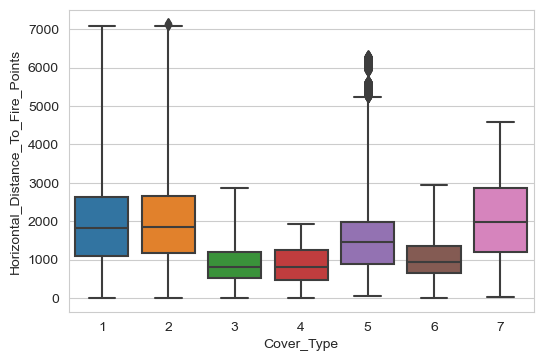

In [42]:
num_outliers(df, "Horizontal_Distance_To_Fire_Points", whis=3)

<AxesSubplot:xlabel='Cover_Type', ylabel='Horizontal_Distance_To_Fire_Points'>

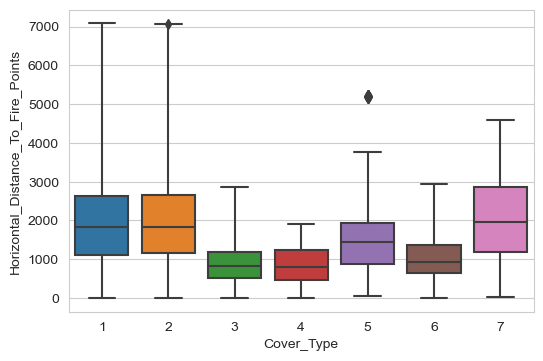

In [43]:
remove_outliers(df, "Horizontal_Distance_To_Fire_Points", whis=3)

In [44]:
tree.shape

(250000, 55)

In [45]:
df.shape

(250000, 55)

In [46]:
df.isnull().sum().sum()

3434

In [47]:
df.dropna(inplace=True)

In [48]:
df.isnull().sum().sum()

0

In [49]:
tree.shape[0] - df.shape[0] 

3251

## 3. Feature Engineering with *sqlite3* Library

Feature engineering is an optional process to increase the predictive success of the model. The effort you put in should be worth increasing success. So you can develop your own feature engineering approach.

Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

You are requested to do feature engineering operations with SQL. There are two ways to do this:
1. After moving the final version of your data set to ***SQLite Browser*** and performing feature engineering operations there, you can convert the resulting data set to dataframe format and use it again in python.
2. In Python, you can create a database and table with your data set by using the functions of the sqlite3 library, after performing feature engineering with SQL, you can convert the resulting data set to a dataframe.

In this case, we will illustrate the second method.

Follow the steps below to do feature engineering with the [sqlite3](https://docs.python.org/3/library/sqlite3.html) library:
 1. Import *sqlite3* library
 2. Create a sqlite database (``"tree_database"``) and transferring dataframe(``tree1``) from python into database table (``covtype2``)
  - You can use *connect(), to_sql() and read_sql_query()* functions.
 3. Assign SQL codes for feature engineering to an object. (produce or transform new columns, get rid of unnecassary columns, make the dataset ready to model)
 4. Transform final version of SQL table to dataframe.
 
Finally, you can save the final version of your data as csv for use in your models and work on a different notebook. On the other hand, you can continue to work on this notebook with the last dataframe.

### My Plan of Feature Extraction
- I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- There is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new column which represent them. So I should drop these columns.

In [50]:
import sqlite3

- Creation a ``sqlite`` database (``"tree_database"``) and transferring dataframe(``tree1``) from python into database table (``covtype2``)

In [51]:
# Creation of the connection and importing dataframe into database.
with sqlite3.connect("tree_database.db") as cnnct:
    df.to_sql("covtype2", cnnct, if_exists = "replace")

In [52]:
query1 = """SELECT *, (Horizontal_Distance_To_Hydrology*Horizontal_Distance_To_Hydrology)+
(Vertical_Distance_To_Hydrology*Vertical_Distance_To_Hydrology) as Square_Hypo_Distance
FROM covtype2;"""

In [53]:
query2 = """SELECT Elevation, Aspect, Slope, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm,
Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4,
Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6, Soil_Type7, Soil_Type8,
Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16, Soil_Type17, 
Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21, Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25,
Soil_Type26, Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33, 
Soil_Type34, Soil_Type35, Soil_Type36, Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type,
Square_Hypo_Distance
FROM covtype2;"""

In [82]:
with sqlite3.connect("tree_database.db") as cnnct:
    df1 = pd.read_sql_query(query1, cnnct)  # transforming and exporting to df1
    df1.to_sql("covtype2", cnnct, if_exists = "replace")  # importing again to dropping columns
    df2 = pd.read_sql_query(query2, cnnct)  # exporting table to df2

IndentationError: unexpected indent (Temp/ipykernel_6836/475339501.py, line 2)

In [81]:
df2.info()

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)
 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - KNN (Use ``KNeighborsClassifier`` model from ``sklearn.neighbors`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [57]:
X=df.drop(["Cover_Type"], axis=1)
y=df["Cover_Type"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

In [59]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling and Model Performance

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#### When to use micro-averaging and macro-averaging scores?

1.Use micro-averaging score when there is a need to weight each instance or prediction equally.

    PrecisionMicroAvg=(TP1+TP2+…+TPn)/(TP1+TP2+…+TPn+FP1+FP2+…+FPn)

2.Use macro-averaging score when all classes need to be treated equally to evaluate the overall performance of the classifier with regard to the most frequent class labels.

    PrecisionMacroAvg=(Prec1+Prec2+…+Precn)/n

3.Use weighted macro-averaging score in case of class imbalances (different number of instances related to different class labels). The weighted macro-average is calculated by weighting the score of each class label by the number of true instances when calculating the average.

In [61]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision_macro" : precision_score(y_train, y_train_pred, average = "macro"),
                            "Recall_macro" : recall_score(y_train, y_train_pred, average = "macro"),                          
                            "f1_macro" : f1_score(y_train, y_train_pred, average = "macro")},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision_macro" : precision_score(y_test, y_pred, average = "macro"),
                           "Recall_macro" : recall_score(y_test, y_pred, average = "macro"),                          
                           "f1_macro" : f1_score(y_test, y_pred, average = "macro")}}
    
    return pd.DataFrame(scores)

In [62]:
def model_performance(y_train, y_train_pred, y_test, y_pred):
    print(confusion_matrix(y_test, y_pred))
    print("-------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    print("-------------------------------------------------------")
    print(train_val(y_train, y_train_pred, y_test, y_pred))

In [79]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.predict_proba(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

In [64]:
def plot_multiclass_roc_for_svm(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

In [66]:
log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_proba=log_model.predict_proba(X_test_scaled)
y_pred=log_model.predict(X_test_scaled)
y_train_pred=log_model.predict(X_train_scaled)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[7073 1793    6    0  466   50 1211]
 [2473 5734  204    7 1679  400   64]
 [   0   42 5635 1466  567 2907    0]
 [   0    0  629 9447    0  583    0]
 [ 159 1311  249    0 8122  587    0]
 [   0  197 2195  855  494 6964    0]
 [1076    0    0    0    6    0 9374]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.66      0.67      0.66     10599
           2       0.63      0.54      0.58     10561
           3       0.63      0.53      0.58     10617
           4       0.80      0.89      0.84     10659
           5       0.72      0.78      0.75     10428
           6       0.61      0.65      0.63     10705
           7       0.88      0.90      0.89     10456

    accuracy                           0.71     74025
   macro avg       0.70      0.71      0.70     74025
weighted avg       0.70      0.71      0.70     74025

-------------------------------------------------------
                 train_s

In [69]:
log_model=LogisticRegression(class_weight = "balanced")
log_model.fit(X_train_scaled, y_train)
y_pred_proba=log_model.predict_proba(X_test_scaled)
y_pred=log_model.predict(X_test_scaled)
y_train_pred=log_model.predict(X_train_scaled)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[7019 1850    6    0  463   50 1211]
 [2415 5829  214    8 1646  384   65]
 [   0   48 5611 1455  595 2908    0]
 [   0    0  630 9458    0  571    0]
 [ 174 1343  229    0 8114  568    0]
 [   0  225 2204  851  458 6967    0]
 [1111    0    0    0    6    0 9339]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.65      0.66      0.66     10599
           2       0.63      0.55      0.59     10561
           3       0.63      0.53      0.58     10617
           4       0.80      0.89      0.84     10659
           5       0.72      0.78      0.75     10428
           6       0.61      0.65      0.63     10705
           7       0.88      0.89      0.89     10456

    accuracy                           0.71     74025
   macro avg       0.70      0.71      0.70     74025
weighted avg       0.70      0.71      0.70     74025

-------------------------------------------------------
                 train_s

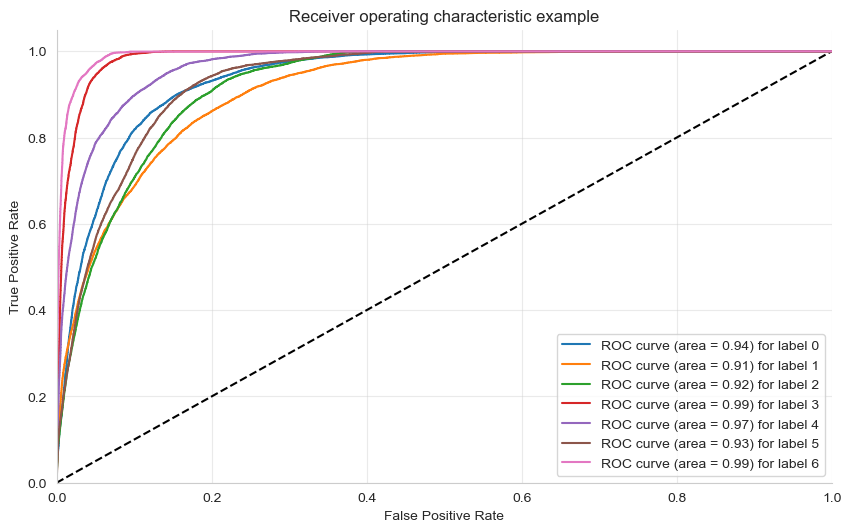

In [68]:
plot_multiclass_roc(log_model, X_test_scaled, y_test, n_classes=7, figsize=(10, 6))

In [83]:
log_acc = accuracy_score(y_test, y_pred)
log_f1 = f1_score(y_test, y_pred, average = "macro")
log_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
log_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
log_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
log_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

In [84]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(log_model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

NameError: name 'ClassPredictionError' is not defined

In [72]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(log_model)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

ModuleNotFoundError: No module named 'yellowbrick'

In [73]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(log_model, support=True)
visualizer.fit(X_train_scaled, y_train)        
visualizer.score(X_test_scaled, y_test)        
visualizer.show()

ModuleNotFoundError: No module named 'yellowbrick'

### KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
'''
test_error_rates = []

for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k, algorithm = "kd_tree")
    knn_model.fit(X_train_scaled, y_train) 
    y_pred = knn_model.predict(X_test_scaled)
    
    test_error = 1 - f1_score(y_test, y_pred, average = "weighted")
    test_error_rates.append(test_error)
'''

'\ntest_error_rates = []\n\nfor k in range(1,20):\n    knn_model = KNeighborsClassifier(n_neighbors=k, algorithm = "kd_tree")\n    knn_model.fit(X_train_scaled, y_train) \n    y_pred = knn_model.predict(X_test_scaled)\n    \n    test_error = 1 - f1_score(y_test, y_pred, average = "weighted")\n    test_error_rates.append(test_error)\n'

In [87]:
'''
plt.figure(figsize=(15,8))
plt.plot(range(1,20), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.05, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.06, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
'''

'\nplt.figure(figsize=(15,8))\nplt.plot(range(1,20), test_error_rates, color=\'blue\', linestyle=\'--\', marker=\'o\',\n         markerfacecolor=\'red\', markersize=10)\nplt.title(\'Error Rate vs. K Value\')\nplt.xlabel(\'K_values\')\nplt.ylabel(\'Error Rate\')\nplt.hlines(y=0.05, xmin = 0, xmax = 30, colors= \'r\', linestyles="--")\nplt.hlines(y=0.06, xmin = 0, xmax = 30, colors= \'r\', linestyles="--")\n'

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5, algorithm = "kd_tree")
knn_model.fit(X_train_scaled, y_train)
y_pred_proba=knn_model.predict_proba(X_test_scaled)
y_pred=knn_model.predict(X_test_scaled)
y_train_pred=knn_model.predict(X_train_scaled)
model_performance(y_train, y_train_pred, y_test, y_pred)

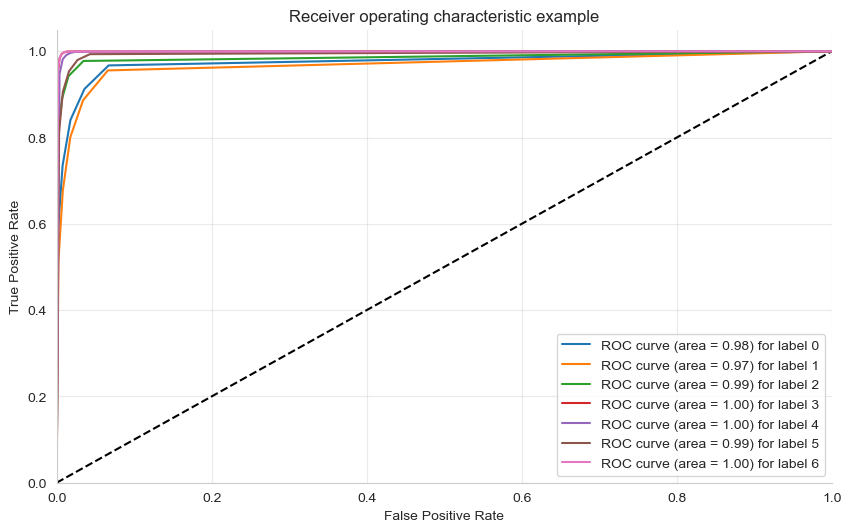

In [78]:
plot_multiclass_roc(knn_model, X_test_scaled, y_test, n_classes=7, figsize=(10, 6))

In [ ]:
knn_acc = accuracy_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred, average = "macro")
knn_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
knn_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
knn_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
knn_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

In [78]:
#from yellowbrick.classifier import ClassPredictionError

#visualizer = ClassPredictionError(knn_model)
#visualizer.fit(X_train_scaled, y_train)
#visualizer.score(X_test_scaled, y_test)
#visualizer.show()

In [79]:
#from yellowbrick.classifier import ConfusionMatrix

#cm = ConfusionMatrix(knn_model)
#cm.fit(X_train_scaled, y_train)
#cm.score(X_test_scaled, y_test)
#cm.show()

In [80]:
#from yellowbrick.classifier import ClassificationReport

#visualizer = ClassificationReport(knn_model, support=True)
#visualizer.fit(X_train_scaled, y_train)        
#visualizer.score(X_test_scaled, y_test)        
#visualizer.show()

### SVM

In [81]:
from sklearn.svm import SVC, LinearSVC

In [82]:
svm_model = LinearSVC(class_weight = "balanced", random_state = 38)
svm_model.fit(X_train_scaled, y_train)
y_pred_proba=svm_model.decision_function(X_test_scaled)
y_pred=svm_model.predict(X_test_scaled)
y_train_pred=svm_model.predict(X_train_scaled)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[41692 14275    66     0   900   442  5251]
 [17358 57822  2243    23  3150  2683   371]
 [    0   402  7640   622   100  1962     0]
 [    0     0   203   543     0    78     0]
 [   37  1301   283     0  1048    74     0]
 [    0   433  1783   210   229  2552     0]
 [ 1009    22     1     0     1     0  4980]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.69      0.67      0.68     62626
           2       0.78      0.69      0.73     83650
           3       0.63      0.71      0.67     10726
           4       0.39      0.66      0.49       824
           5       0.19      0.38      0.26      2743
           6       0.33      0.49      0.39      5207
           7       0.47      0.83      0.60      6013

    accuracy                           0.68    171789
   macro avg       0.50      0.63      0.55    171789
weighted avg       0.70      0.68      0.69    171789

-------------------------------

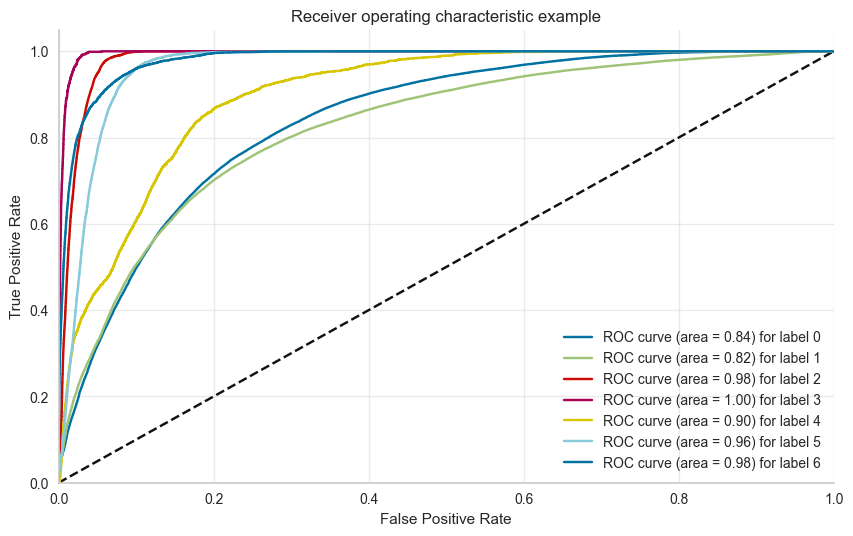

In [83]:
plot_multiclass_roc_for_svm(svm_model, X_test_scaled, y_test, n_classes=7, figsize=(10, 6))

In [84]:
svm_acc = accuracy_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred, average = "macro")
svm_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
svm_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
svm_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
#svm_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

In [85]:
#from yellowbrick.classifier import ClassPredictionError

#visualizer = ClassPredictionError(svm_model)
#visualizer.fit(X_train_scaled, y_train)
#visualizer.score(X_test_scaled, y_test)
#visualizer.show()

In [86]:
#from yellowbrick.classifier import ConfusionMatrix

#cm = ConfusionMatrix(svm_model)
#cm.fit(X_train_scaled, y_train)
#cm.score(X_test_scaled, y_test)
#cm.show()

In [87]:
#from yellowbrick.classifier import ClassificationReport

#visualizer = ClassificationReport(svm_model, support=True)
#visualizer.fit(X_train_scaled, y_train)        
#visualizer.score(X_test_scaled, y_test)        
#visualizer.show()

- SVM has been widely used in finance. For example, predicting stock price via SVM has been a acknowledged application in the industry.
- In classification of text and handwritten objects, SVM performs well.
- It may not be very successful in datasets with more than 100,000 data.

### Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=38)
rf_model.fit(X_train, y_train)
y_pred_proba=rf_model.predict_proba(X_test)
y_pred=rf_model.predict(X_test)
y_train_pred=rf_model.predict(X_train)
model_performance(y_train, y_train_pred, y_test, y_pred)

[[58961  3495     2     0    18    13   137]
 [ 2020 81206   176     1   115   104    28]
 [    2   174 10280    41     6   223     0]
 [    0     0    98   709     0    17     0]
 [   24   526    46     0  2136    11     0]
 [    3   190   415    24     5  4570     0]
 [  290    31     0     0     0     0  5692]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     62626
           2       0.95      0.97      0.96     83650
           3       0.93      0.96      0.95     10726
           4       0.91      0.86      0.89       824
           5       0.94      0.78      0.85      2743
           6       0.93      0.88      0.90      5207
           7       0.97      0.95      0.96      6013

    accuracy                           0.95    171789
   macro avg       0.94      0.90      0.92    171789
weighted avg       0.95      0.95      0.95    171789

-------------------------------

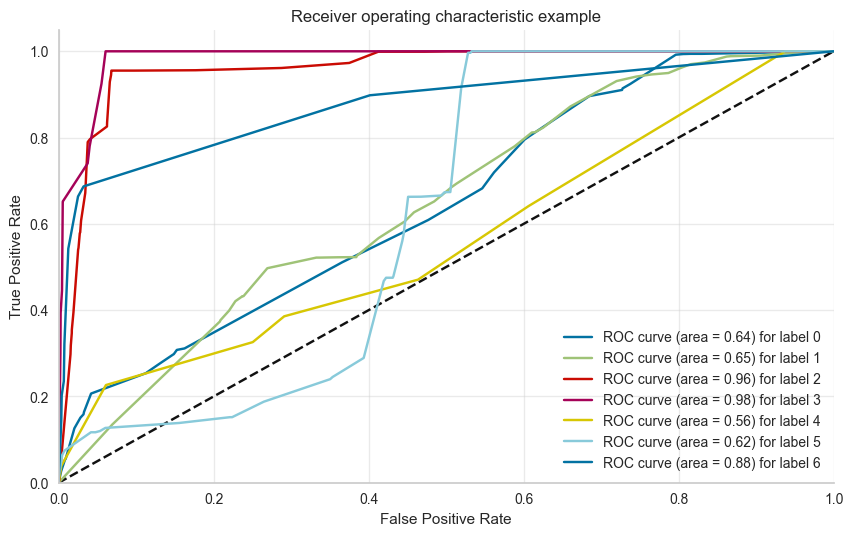

In [90]:
plot_multiclass_roc(rf_model, X_test, y_test, n_classes=7, figsize=(10, 6))

In [91]:
rf_acc = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred, average = "macro")
rf_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
rf_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
rf_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
rf_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

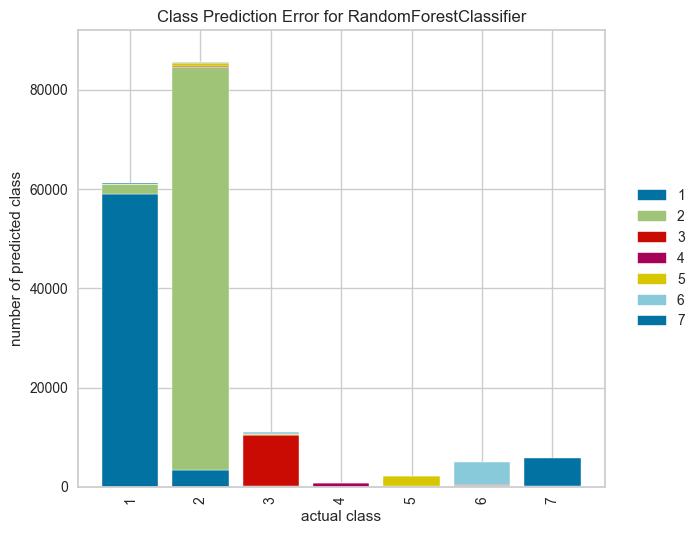

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [92]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rf_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

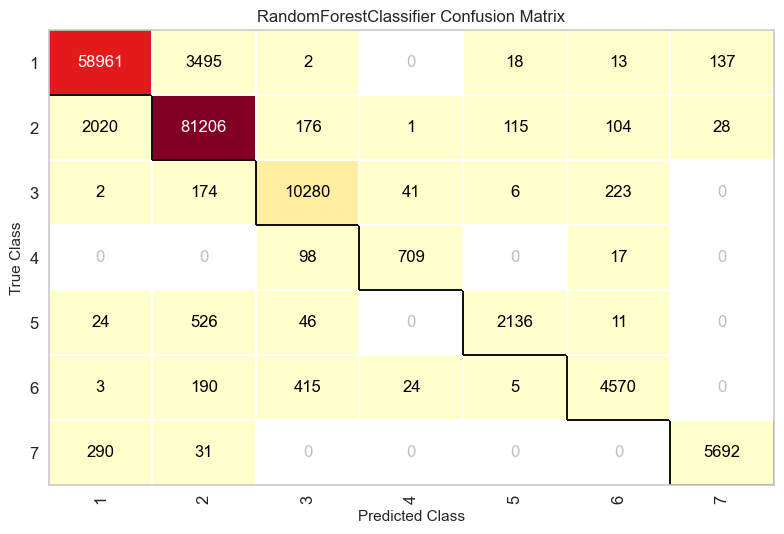

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [93]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rf_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

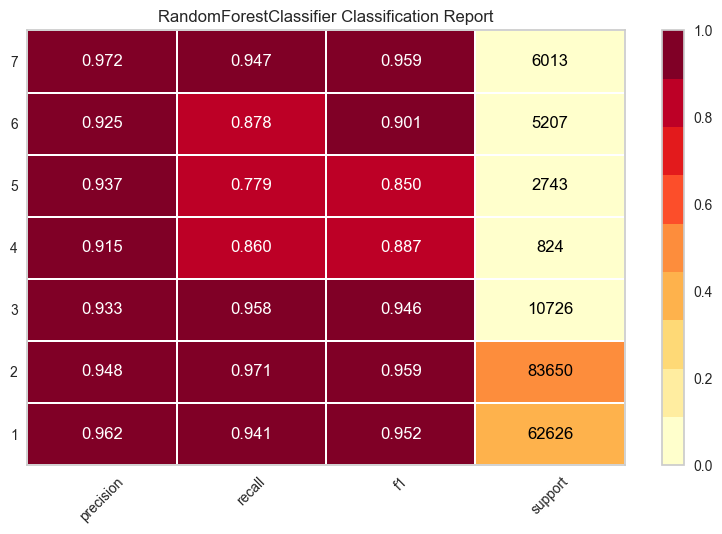

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [94]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### Comparing

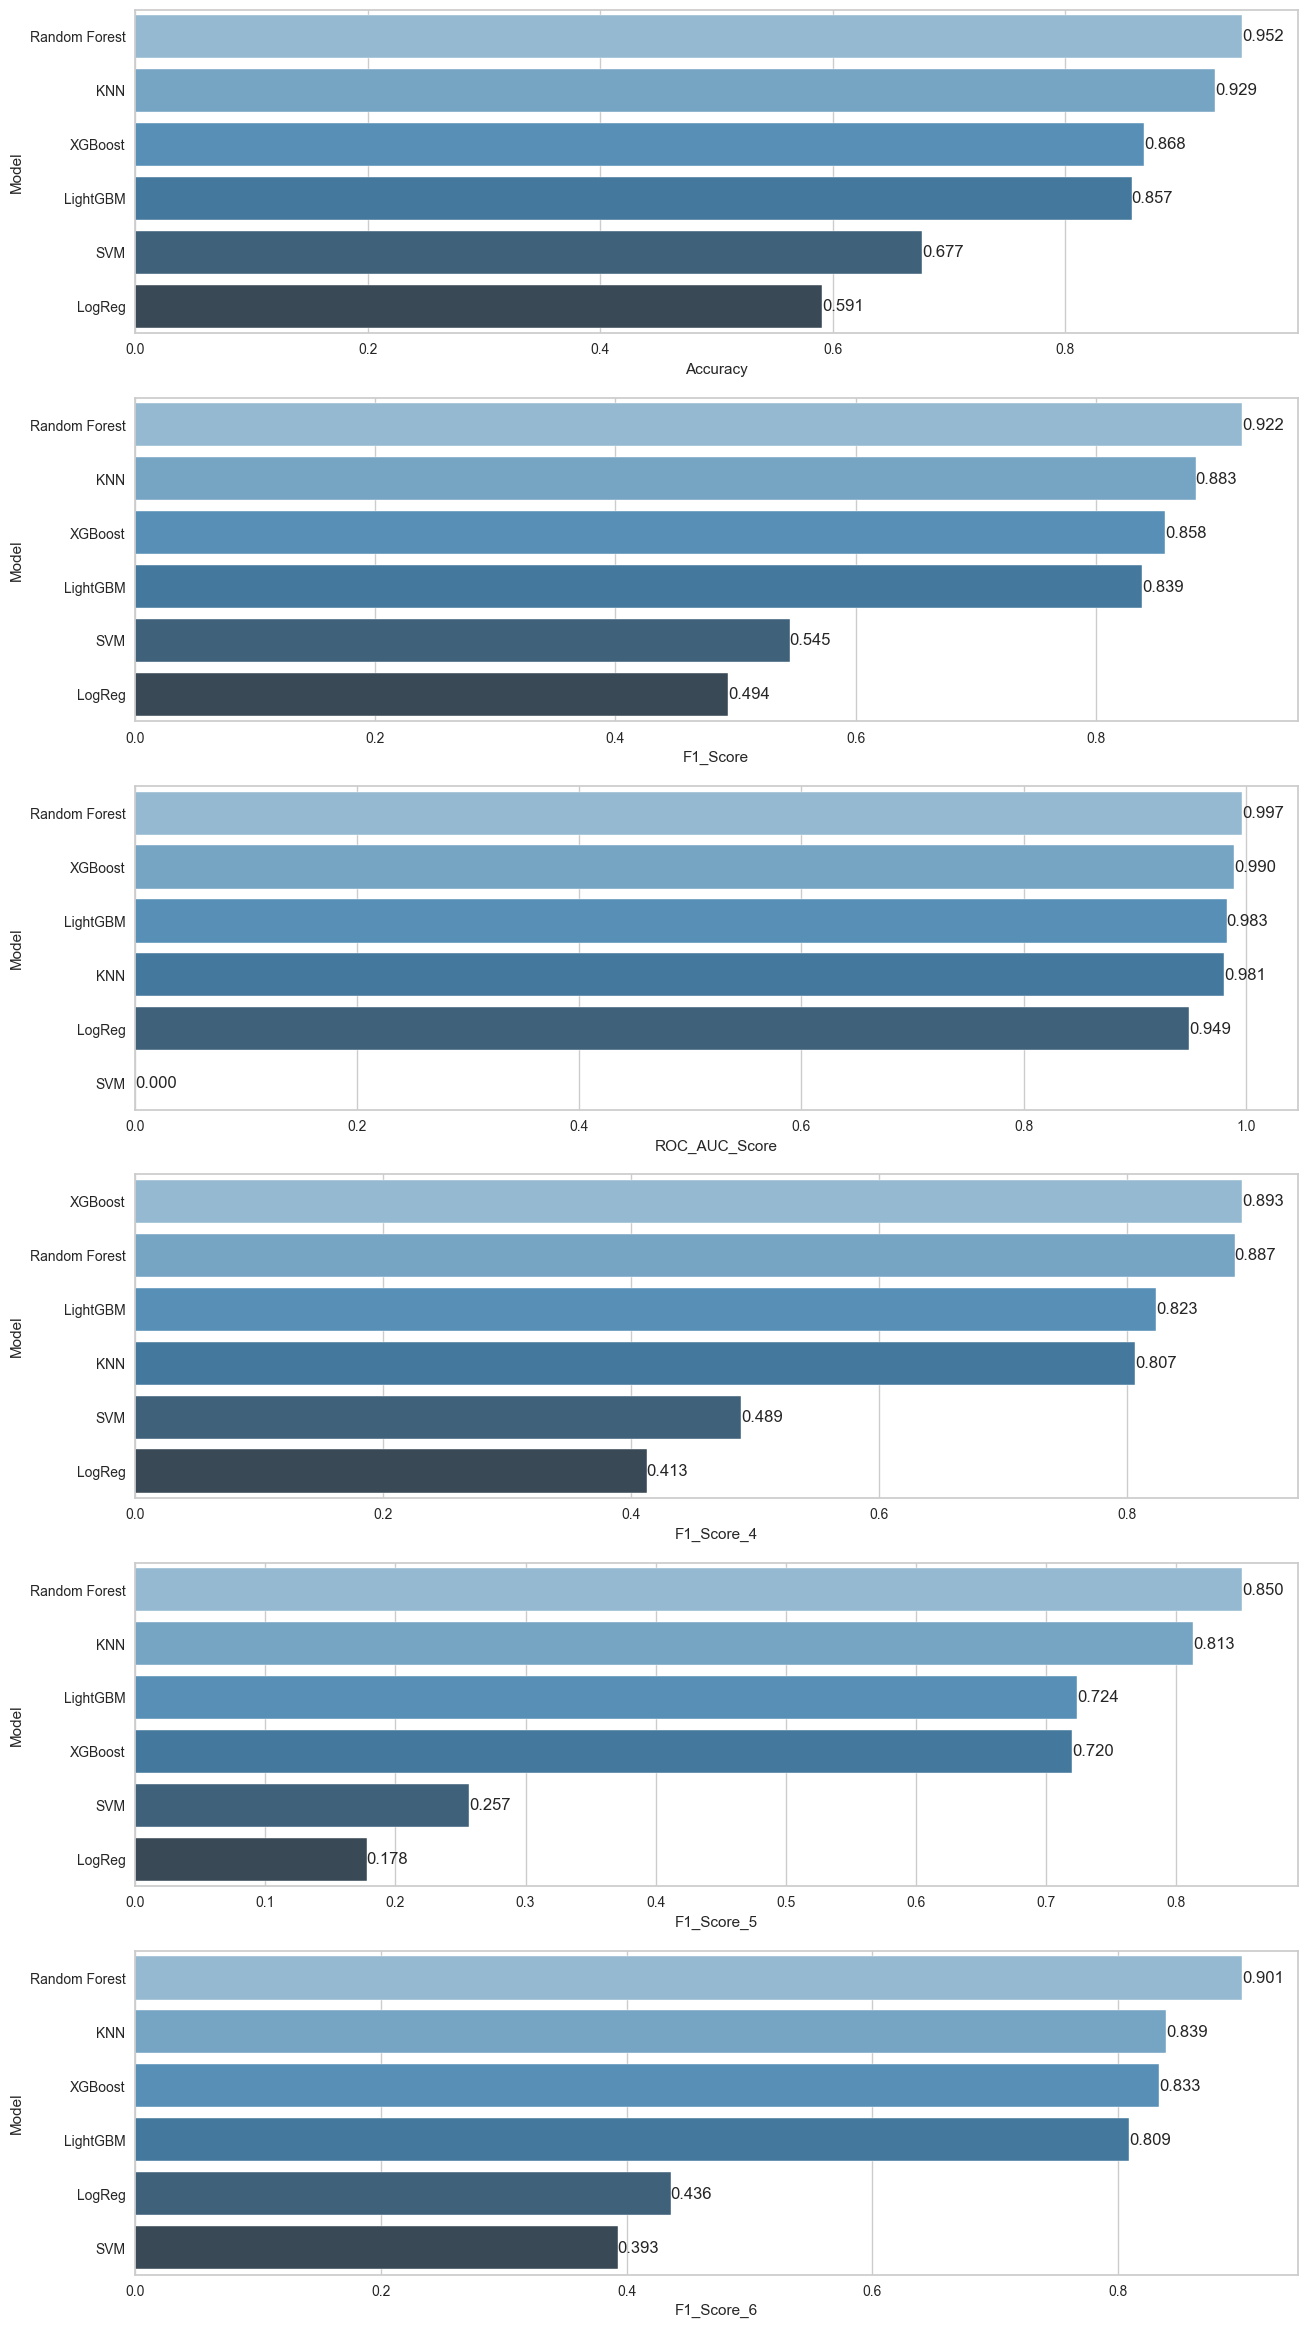

In [110]:
compare = pd.DataFrame({"Model": ["LogReg", "KNN", "SVM", "Random Forest"],
                        "Accuracy": [log_acc, knn_acc, svm_acc, rf_acc, xgb_acc, lgb_acc],
                        "F1_Score": [log_f1, knn_f1, svm_f1, rf_f1, xgb_f1, lgb_f1],
                        "F1_Score_4": [log_f1_4, knn_f1_4, svm_f1_4, rf_f1_4, xgb_f1_4, lgb_f1_4],
                        "F1_Score_5": [log_f1_5, knn_f1_5, svm_f1_5, rf_f1_5, xgb_f1_5, lgb_f1_5],
                        "F1_Score_6": [log_f1_6, knn_f1_6, svm_f1_6, rf_f1_6, xgb_f1_6, lgb_f1_6],
                        "ROC_AUC_Score": [log_auc, knn_auc, 0, rf_auc, xgb_auc, lgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(611)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(612)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(613)
compare = compare.sort_values(by="ROC_AUC_Score", ascending=False)
ax=sns.barplot(x="ROC_AUC_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(614)
compare = compare.sort_values(by="F1_Score_4", ascending=False)
ax=sns.barplot(x="F1_Score_4", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(615)
compare = compare.sort_values(by="F1_Score_5", ascending=False)
ax=sns.barplot(x="F1_Score_5", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(616)
compare = compare.sort_values(by="F1_Score_6", ascending=False)
ax=sns.barplot(x="F1_Score_6", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

## SMOTE - Synthetic Minority Oversampling TEchnique

In [111]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [112]:
y_train.value_counts()

2    195181
1    146126
3     25028
7     14029
6     12149
5      6402
4      1923
Name: Cover_Type, dtype: int64

In [113]:
over = SMOTE(sampling_strategy= {4: 15000,
                                 5: 15000,
                                 6: 15000,
                                 7: 15000}, random_state = 38)
under = RandomUnderSampler(sampling_strategy= {1: 30000,
                                               2: 30000}, random_state = 38)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [114]:
y_resampled.value_counts()

1    30000
2    30000
3    25028
4    15000
5    15000
6    15000
7    15000
Name: Cover_Type, dtype: int64

In [115]:
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
log_model=LogisticRegression()
log_model.fit(X_resampled_scaled, y_resampled)
y_pred_proba=log_model.predict_proba(X_test_scaled)
y_pred=log_model.predict(X_test_scaled)
y_train_pred=log_model.predict(X_resampled_scaled)
model_performance(y_resampled, y_train_pred, y_test, y_pred)

[[44614 11916    60     0  1078   137  4821]
 [20590 50377  2501    16  7796  2033   337]
 [    0   177  8090   915   234  1310     0]
 [    0     0   131   625     0    68     0]
 [  102   840   174     0  1552    75     0]
 [    0   220  2331   209   144  2303     0]
 [  977     0     0     0     1     0  5035]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.67      0.71      0.69     62626
           2       0.79      0.60      0.68     83650
           3       0.61      0.75      0.67     10726
           4       0.35      0.76      0.48       824
           5       0.14      0.57      0.23      2743
           6       0.39      0.44      0.41      5207
           7       0.49      0.84      0.62      6013

    accuracy                           0.66    171789
   macro avg       0.49      0.67      0.54    171789
weighted avg       0.70      0.66      0.67    171789

-------------------------------

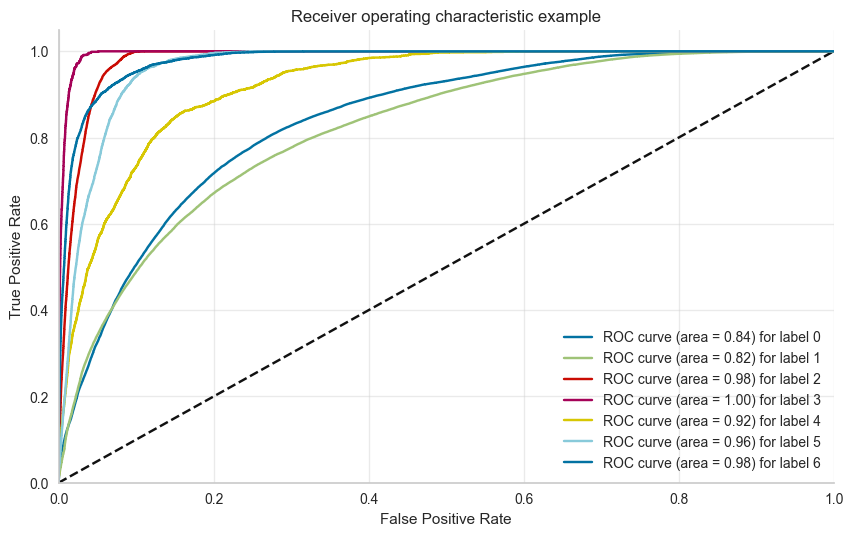

In [118]:
plot_multiclass_roc(log_model, X_test_scaled, y_test, n_classes=7, figsize=(10, 6))

In [119]:
log_s_acc = accuracy_score(y_test, y_pred)
log_s_f1 = f1_score(y_test, y_pred, average = "macro")
log_s_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
log_s_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
log_s_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
log_s_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

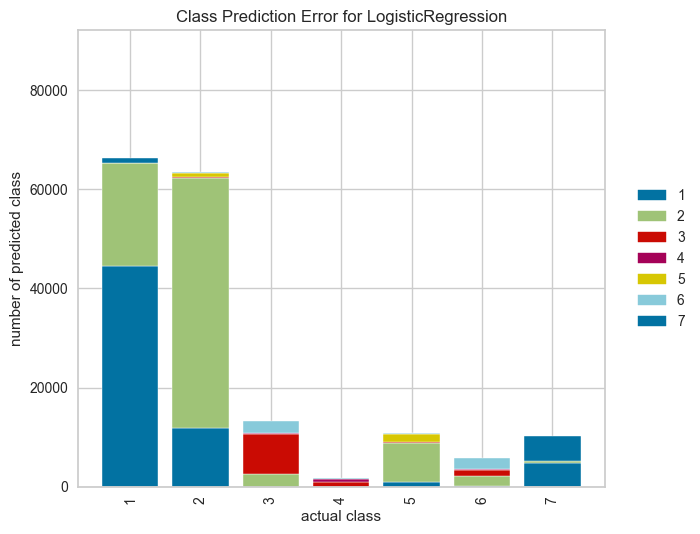

<AxesSubplot:title={'center':'Class Prediction Error for LogisticRegression'}, xlabel='actual class', ylabel='number of predicted class'>

In [120]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(log_model)
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

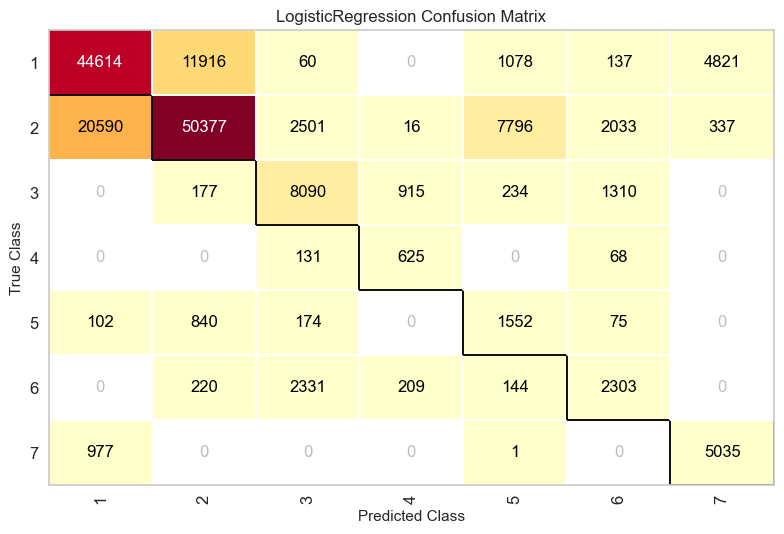

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [121]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(log_model)
cm.fit(X_train_scaled, y_train)
cm.score(X_test_scaled, y_test)
cm.show()

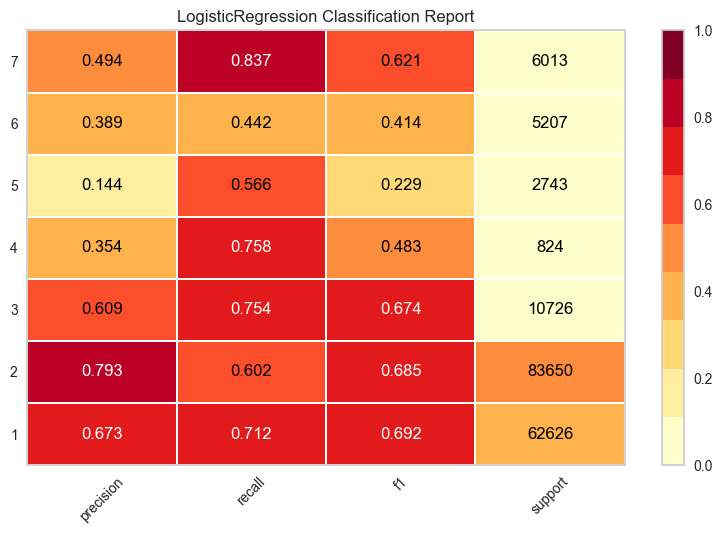

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [122]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(log_model, support=True)
visualizer.fit(X_train_scaled, y_train)        
visualizer.score(X_test_scaled, y_test)        
visualizer.show()

### KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
'''
test_error_rates = []

for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k, algorithm = "kd_tree")
    knn_model.fit(X_resampled_scaled, y_resampled) 
    y_pred = knn_model.predict(X_test_scaled)
    
    test_error = 1 - f1_score(y_test, y_pred, average = "weighted")
    test_error_rates.append(test_error)
'''

'\ntest_error_rates = []\n\nfor k in range(1,20):\n    knn_model = KNeighborsClassifier(n_neighbors=k, algorithm = "kd_tree")\n    knn_model.fit(X_resampled_scaled, y_resampled) \n    y_pred = knn_model.predict(X_test_scaled)\n    \n    test_error = 1 - f1_score(y_test, y_pred, average = "weighted")\n    test_error_rates.append(test_error)\n'

In [125]:
'''
plt.figure(figsize=(15,8))
plt.plot(range(1,20), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.05, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.06, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
'''

'\nplt.figure(figsize=(15,8))\nplt.plot(range(1,20), test_error_rates, color=\'blue\', linestyle=\'--\', marker=\'o\',\n         markerfacecolor=\'red\', markersize=10)\nplt.title(\'Error Rate vs. K Value\')\nplt.xlabel(\'K_values\')\nplt.ylabel(\'Error Rate\')\nplt.hlines(y=0.05, xmin = 0, xmax = 30, colors= \'r\', linestyles="--")\nplt.hlines(y=0.06, xmin = 0, xmax = 30, colors= \'r\', linestyles="--")\n'

In [126]:
knn_model = KNeighborsClassifier(n_neighbors=5, algorithm = "kd_tree")
knn_model.fit(X_resampled_scaled, y_resampled)
y_pred_proba=knn_model.predict_proba(X_test_scaled)
y_pred=knn_model.predict(X_test_scaled)
y_train_pred=knn_model.predict(X_resampled_scaled)
model_performance(y_resampled, y_train_pred, y_test, y_pred)

[[54012  6406    22     0   494    91  1601]
 [ 8854 68881  1208    18  3181  1229   279]
 [    0    51  9837   218    45   575     0]
 [    0     0    67   729     0    28     0]
 [   22    87    45     0  2575    14     0]
 [    4    39   511    82    28  4543     0]
 [   93    15     0     0     0     0  5905]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.86      0.86      0.86     62626
           2       0.91      0.82      0.87     83650
           3       0.84      0.92      0.88     10726
           4       0.70      0.88      0.78       824
           5       0.41      0.94      0.57      2743
           6       0.70      0.87      0.78      5207
           7       0.76      0.98      0.86      6013

    accuracy                           0.85    171789
   macro avg       0.74      0.90      0.80    171789
weighted avg       0.87      0.85      0.86    171789

-------------------------------

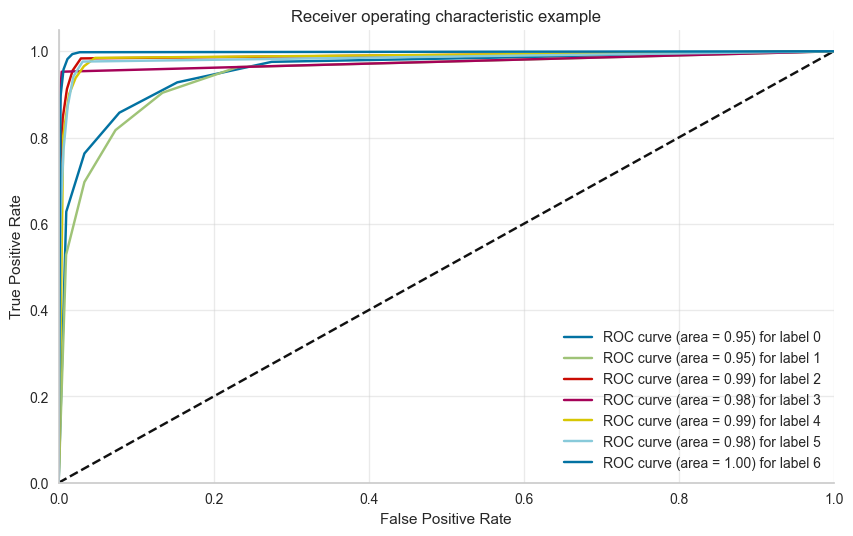

In [127]:
plot_multiclass_roc(knn_model, X_test_scaled, y_test, n_classes=7, figsize=(10, 6))

In [128]:
knn_s_acc = accuracy_score(y_test, y_pred)
knn_s_f1 = f1_score(y_test, y_pred, average = "macro")
knn_s_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
knn_s_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
knn_s_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
knn_s_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

In [129]:
#from yellowbrick.classifier import ClassPredictionError

#visualizer = ClassPredictionError(knn_model)
#visualizer.fit(X_train_scaled, y_train)
#visualizer.score(X_test_scaled, y_test)
#visualizer.show()

In [130]:
#from yellowbrick.classifier import ConfusionMatrix

#cm = ConfusionMatrix(knn_model)
#cm.fit(X_train_scaled, y_train)
#cm.score(X_test_scaled, y_test)
#cm.show()

In [131]:
#from yellowbrick.classifier import ClassificationReport

#visualizer = ClassificationReport(knn_model, support=True)
#visualizer.fit(X_train_scaled, y_train)        
#visualizer.score(X_test_scaled, y_test)        
#visualizer.show()

### SVM

In [132]:
from sklearn.svm import SVC, LinearSVC

In [133]:
svm_model = LinearSVC(random_state = 38)
svm_model.fit(X_resampled_scaled, y_resampled)
y_pred_proba=svm_model.decision_function(X_test_scaled)
y_pred=svm_model.predict(X_test_scaled)
y_train_pred=svm_model.predict(X_resampled_scaled)
model_performance(y_resampled, y_train_pred, y_test, y_pred)

[[43501 11014    79     0  1409   439  6184]
 [22613 47215  3301    13  7657  2405   446]
 [    0   136  8631   735   255   969     0]
 [    0     0   145   635     0    44     0]
 [  146   870   339     0  1312    76     0]
 [    0   310  2649   237   335  1676     0]
 [  999    15     1     0    10     0  4988]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.65      0.69      0.67     62626
           2       0.79      0.56      0.66     83650
           3       0.57      0.80      0.67     10726
           4       0.39      0.77      0.52       824
           5       0.12      0.48      0.19      2743
           6       0.30      0.32      0.31      5207
           7       0.43      0.83      0.57      6013

    accuracy                           0.63    171789
   macro avg       0.46      0.64      0.51    171789
weighted avg       0.69      0.63      0.64    171789

-------------------------------

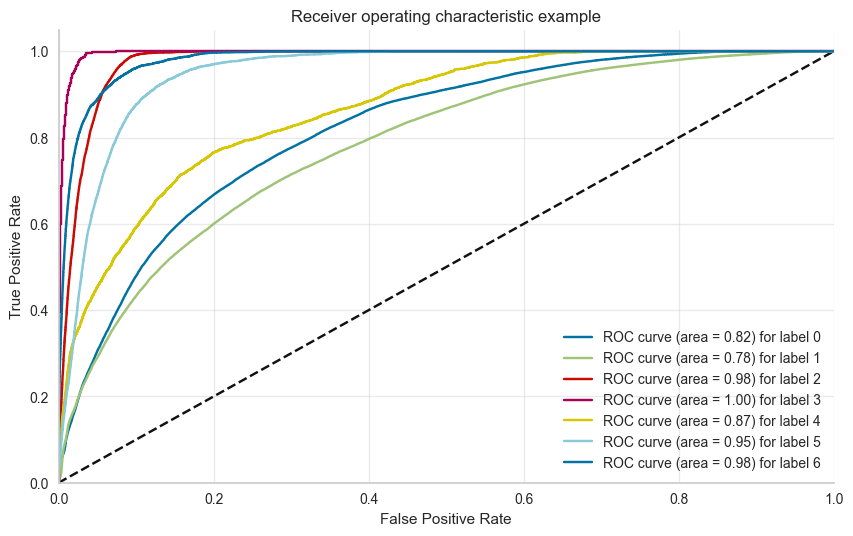

In [134]:
plot_multiclass_roc_for_svm(svm_model, X_test_scaled, y_test, n_classes=7, figsize=(10, 6))

In [135]:
svm_s_acc = accuracy_score(y_test, y_pred)
svm_s_f1 = f1_score(y_test, y_pred, average = "macro")
svm_s_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
svm_s_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
svm_s_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
#svm_s_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

In [136]:
#from yellowbrick.classifier import ClassPredictionError

#visualizer = ClassPredictionError(svm_model)
#visualizer.fit(X_train_scaled, y_train)
#visualizer.score(X_test_scaled, y_test)
#visualizer.show()

In [137]:
#from yellowbrick.classifier import ConfusionMatrix

#cm = ConfusionMatrix(svm_model)
#cm.fit(X_train_scaled, y_train)
#cm.score(X_test_scaled, y_test)
#cm.show()

In [138]:
#from yellowbrick.classifier import ClassificationReport

#visualizer = ClassificationReport(svm_model, support=True)
#visualizer.fit(X_train_scaled, y_train)        
#visualizer.score(X_test_scaled, y_test)        
#visualizer.show()

### Random Forest

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=38)
rf_model.fit(X_resampled, y_resampled)
y_pred_proba=rf_model.predict_proba(X_test)
y_pred=rf_model.predict(X_test)
y_train_pred=rf_model.predict(X_resampled)
model_performance(y_resampled, y_train_pred, y_test, y_pred)

[[56416  5184    25     0   163    59   779]
 [ 6027 74623   960     9  1102   824   105]
 [    1    26 10347    69    13   270     0]
 [    0     0    56   755     0    13     0]
 [    9   107    43     0  2574    10     0]
 [    1    22   371    37     9  4767     0]
 [  100     4     0     0     0     0  5909]]
-------------------------------------------------------
              precision    recall  f1-score   support

           1       0.90      0.90      0.90     62626
           2       0.93      0.89      0.91     83650
           3       0.88      0.96      0.92     10726
           4       0.87      0.92      0.89       824
           5       0.67      0.94      0.78      2743
           6       0.80      0.92      0.86      5207
           7       0.87      0.98      0.92      6013

    accuracy                           0.90    171789
   macro avg       0.85      0.93      0.88    171789
weighted avg       0.91      0.90      0.91    171789

-------------------------------

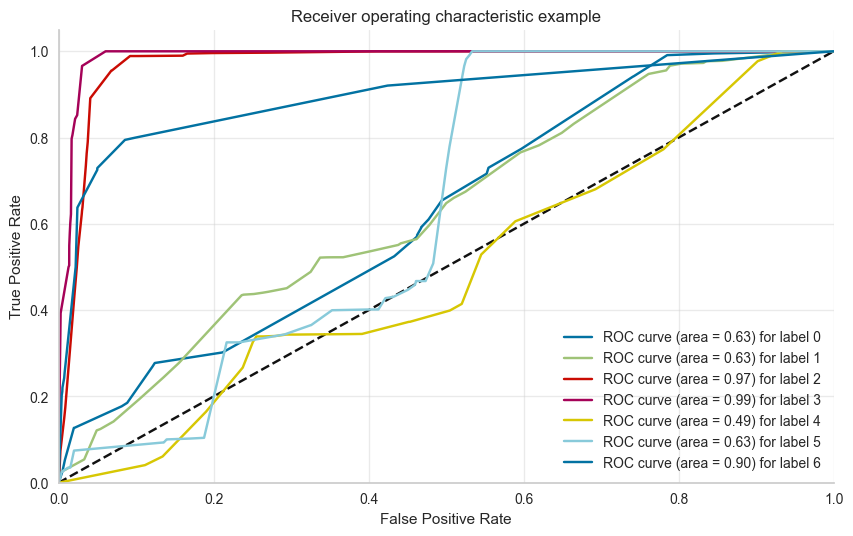

In [141]:
plot_multiclass_roc(rf_model, X_test, y_test, n_classes=7, figsize=(10, 6))

In [142]:
rf_s_acc = accuracy_score(y_test, y_pred)
rf_s_f1 = f1_score(y_test, y_pred, average = "macro")
rf_s_f1_4 = f1_score(y_test, y_pred, labels = [4], average = "macro")
rf_s_f1_5 = f1_score(y_test, y_pred, labels = [5], average = "macro")
rf_s_f1_6 = f1_score(y_test, y_pred, labels = [6], average = "macro")
rf_s_auc = roc_auc_score(y_test, y_pred_proba, average = "macro", multi_class = "ovo")

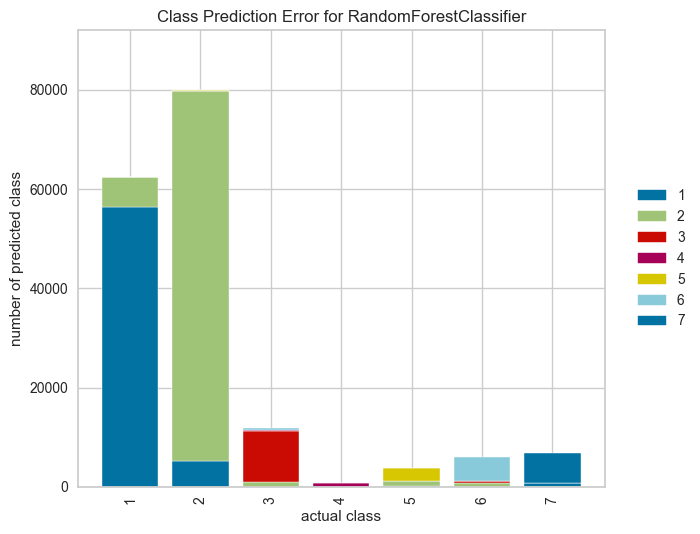

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [143]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rf_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

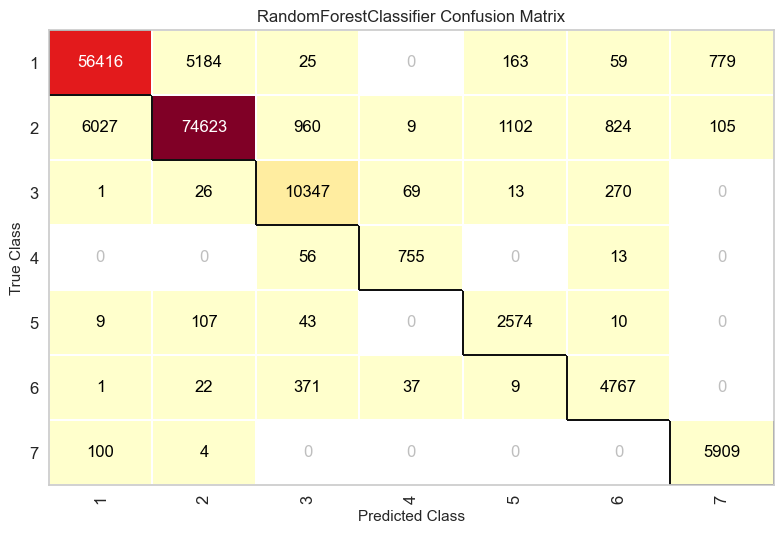

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [144]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rf_model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

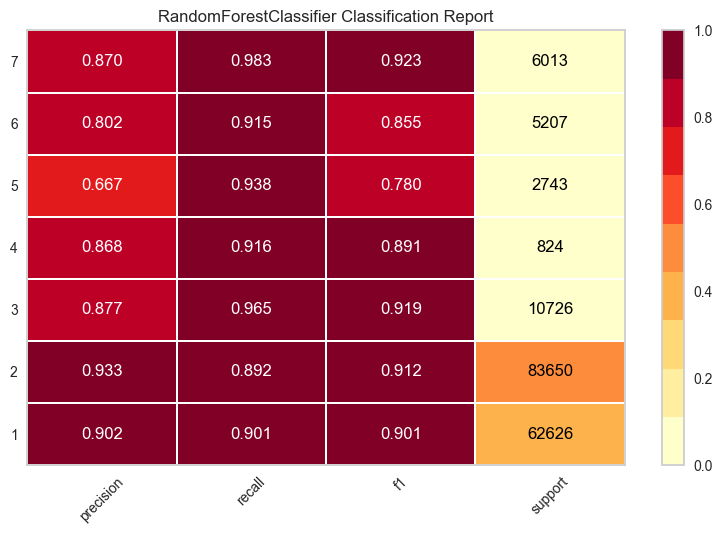

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [145]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rf_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

### Comparing

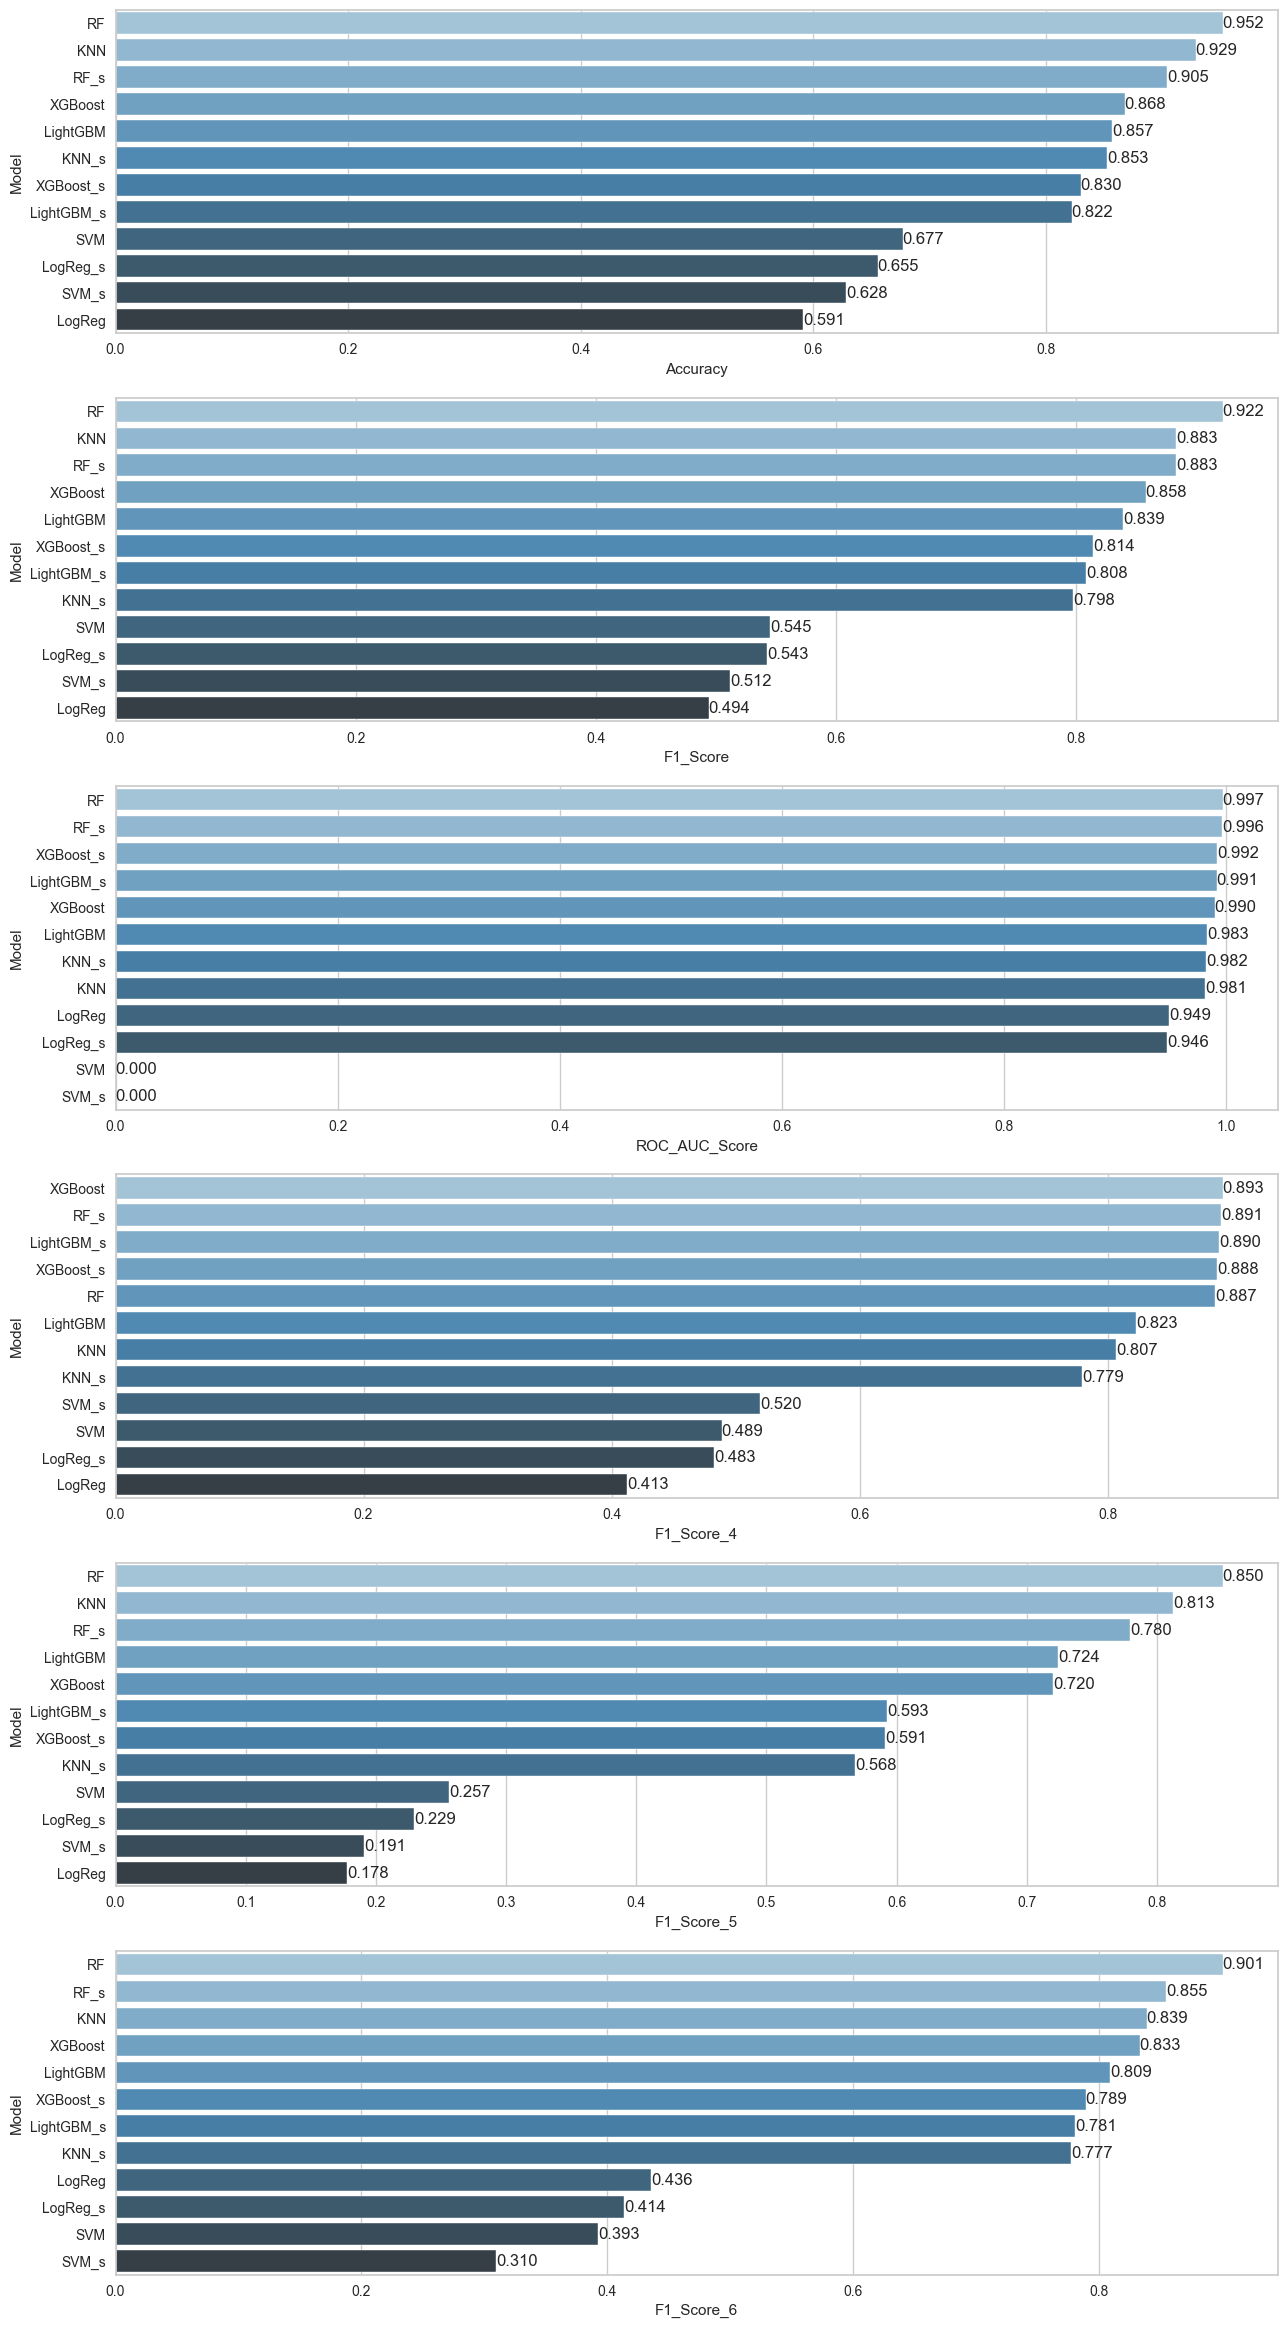

In [160]:
compare = pd.DataFrame({"Model": ["LogReg", "KNN", "SVM", "RF", , "LogReg_s", "KNN_s", "SVM_s", "RF_s",],
                        "Accuracy": [log_acc, knn_acc, svm_acc, rf_acc, xgb_acc, lgb_acc, log_s_acc, knn_s_acc, svm_s_acc, rf_s_acc, xgb_s_acc, lgb_s_acc],
                        "F1_Score": [log_f1, knn_f1, svm_f1, rf_f1, xgb_f1, lgb_f1, log_s_f1, knn_s_f1, svm_s_f1, rf_s_f1, xgb_s_f1, lgb_s_f1],
                        "F1_Score_4": [log_f1_4, knn_f1_4, svm_f1_4, rf_f1_4, xgb_f1_4, lgb_f1_4, log_s_f1_4, knn_s_f1_4, svm_s_f1_4, rf_s_f1_4, xgb_s_f1_4, lgb_s_f1_4],
                        "F1_Score_5": [log_f1_5, knn_f1_5, svm_f1_5, rf_f1_5, xgb_f1_5, lgb_f1_5, log_s_f1_5, knn_s_f1_5, svm_s_f1_5, rf_s_f1_5, xgb_s_f1_5, lgb_s_f1_5],
                        "F1_Score_6": [log_f1_6, knn_f1_6, svm_f1_6, rf_f1_6, xgb_f1_6, lgb_f1_6, log_s_f1_6, knn_s_f1_6, svm_s_f1_6, rf_s_f1_6, xgb_s_f1_6, lgb_s_f1_6],
                        "ROC_AUC_Score": [log_auc, knn_auc, 0, rf_auc, xgb_auc, lgb_auc, log_s_auc, knn_s_auc, 0, rf_s_auc, xgb_s_auc, lgb_s_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(611)
compare = compare.sort_values(by="Accuracy", ascending=False)
ax=sns.barplot(x="Accuracy", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(612)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(613)
compare = compare.sort_values(by="ROC_AUC_Score", ascending=False)
ax=sns.barplot(x="ROC_AUC_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(614)
compare = compare.sort_values(by="F1_Score_4", ascending=False)
ax=sns.barplot(x="F1_Score_4", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(615)
compare = compare.sort_values(by="F1_Score_5", ascending=False)
ax=sns.barplot(x="F1_Score_5", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(616)
compare = compare.sort_values(by="F1_Score_6", ascending=False)
ax=sns.barplot(x="F1_Score_6", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

## Modeling and Prediction

In [161]:
import pickle

In [162]:
final_model = RandomForestClassifier(random_state=101).fit(X, y)

In [163]:
pickle.dump(final_model, open("final_model_tree_types", 'wb'))

In [164]:
my_dict = {"Elevation": 2500,
           "Aspect": 150,
           "Slope": 30,
           "Horizontal_Distance_To_Hydrology": 100,
           "Vertical_Distance_To_Hydrology": 25,
           "Horizontal_Distance_To_Roadways": 2000,
           "Hillshade_9am": 218,
           "Hillshade_Noon": 226,
           "Hillshade_3pm": 143,
           "Horizontal_Distance_To_Fire_Points": 3000,
           "Wilderness": "Area1",
           "Soil": "Type5"
          }

In [165]:
my_dict = pd.DataFrame([my_dict])
my_dict

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness,Soil
0,2500,150,30,100,25,2000,218,226,143,3000,Area1,Type5


In [166]:
my_dict = pd.get_dummies(my_dict).reindex(columns=X.columns, fill_value=0)
my_dict

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2500,150,30,100,25,2000,218,226,143,3000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [167]:
final_model.predict(my_dict)

array([2], dtype=int64)